# MLP Evaluation - ISIC dataset

## 1. First Approach

### 1.1. Preparation
Perform neccesary imports and load preprocessed data

In [32]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier


# Load ground truth
Ytrain = np.load('3rdISICTrainGT_preprocessed.npy')
Ytest = np.load('3rdISICTestGT_preprocessed.npy')

# Load data
Xtrain = np.load('3rdISICTrainpics_preprocessed.npy')
Xtest = np.load('3rdISICTestpics_preprocessed.npy')

Check the shape of the preprocessed data

In [26]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(805, 8100)
(245, 8100)
(805,)
(245,)


In [27]:
# additional import
from sklearn.model_selection import GridSearchCV

### 1.2. Training with a first dummy model

Train the test data with a first choice of hyper parameters

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 20), learning_rate_init=0.01,
              max_iter=300, random_state=3, solver='sgd', verbose=True)
clf.fit(Xtrain, Ytrain)


Iteration 1, loss = 1.99178750
Iteration 2, loss = 2.06211561
Iteration 3, loss = 1.97027137
Iteration 4, loss = 2.03646774
Iteration 5, loss = 2.04247715
Iteration 6, loss = 2.11782123
Iteration 7, loss = 1.97276930
Iteration 8, loss = 1.98914260
Iteration 9, loss = 1.96627610
Iteration 10, loss = 1.96177455
Iteration 11, loss = 1.95566599
Iteration 12, loss = 1.95193410
Iteration 13, loss = 1.94937734
Iteration 14, loss = 1.95329477
Iteration 15, loss = 1.96168151
Iteration 16, loss = 1.95153165
Iteration 17, loss = 1.96468365
Iteration 18, loss = 1.94863078
Iteration 19, loss = 1.95620804
Iteration 20, loss = 1.95512080
Iteration 21, loss = 1.96290656
Iteration 22, loss = 1.95154576
Iteration 23, loss = 1.95487771
Iteration 24, loss = 1.95153599
Iteration 25, loss = 1.94983979
Iteration 26, loss = 1.95032660
Iteration 27, loss = 1.94938493
Iteration 28, loss = 1.94737215
Iteration 29, loss = 1.94777740
Iteration 30, loss = 1.94807251
Iteration 31, loss = 1.94841443
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 20), learning_rate_init=0.01,
              max_iter=300, random_state=3, solver='sgd', verbose=True)

### 1.3. Testing and Evaluation

To evaluate the performance of the model on the dataset we first made predictions with the test dataset and calculated the accuray as well as the F1 score for each class and created a a heatmap of the confusion matrix. With the following results we can summarize that the performance is still very weak.

In [29]:

# Make prediction on test dataset
Ypred=best_clf.predict(Xtest)

# Import accuracy score partial_fit(X, y, classes=None)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(Ytest,Ypred)

0.14285714285714285

In [18]:

from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

# Calculate f1 score 
f1 = f1_score(Ytest, Ypred, average=None)
print("F1 ",f1,"\n")

F1  [0.11428571 0.3030303  0.24028269 0.22393822 0.16724739 0.15841584
 0.1958042 ] 



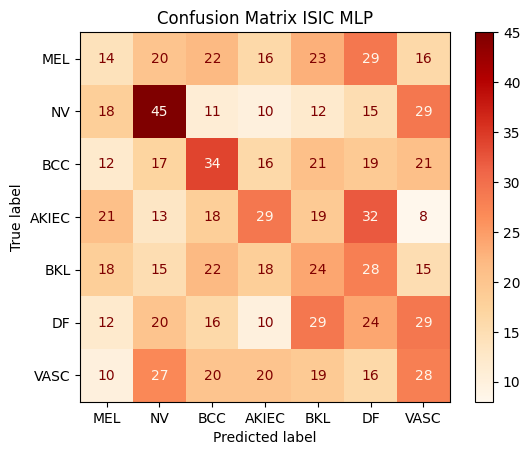

In [19]:
classes = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
#create and plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(best_clf,Xtest,Ytest,display_labels=classes,cmap=plt.cm.OrRd,normalize=None,)
plt.title("Confusion Matrix ISIC MLP")
plt.show()

## 2. ISIC: Hyperparameter Selection

Now we want to investigate how we can improve this performance by better hyperparameter selection. For this we used GridSearchCV from scikit-learn. This tool runs through different possible combinations of previously defined parameters and determines the best combination of parameters with respect to the chosen scoring metric, which in our case is the accuracy of the model. It is also possible to define the number of CV folds for each combination of parameters. We have chosen 3 folds for this step.

In [33]:
# Define which hyperparameters should be used
param_grid = {
    'random_state': [1,3,5], #Use different seeds
    'hidden_layer_sizes': [ (10,),(8, 6), (10, 8),(20, 10),(100, 50, 20)],
    'activation': ['identity','relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=MLPClassifier(verbose=True,max_iter=300),
                           scoring='accuracy', # optimize the accuracy with the selection of the hyperparameters
                           param_grid=param_grid,
                           cv=3)  # cv is the amount of folds for cross validation
# Perform Grid Search to identify the best hyper parameters
grid_search.fit(Xtrain, Ytrain)

print("Best Hyperparameters to optimize accuracy:", grid_search.best_params_)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.15928729
Iteration 2, loss = 2.21751452
Iteration 3, loss = 2.26821807
Iteration 4, loss = 2.19708402
Iteration 5, loss = 2.23966471
Iteration 6, loss = 2.40880194
Iteration 7, loss = 2.10201345
Iteration 8, loss = 2.23871159
Iteration 9, loss = 2.18587944
Iteration 10, loss = 2.14161109
Iteration 11, loss = 2.05361159
Iteration 12, loss = 2.01004965
Iteration 13, loss = 2.04532252
Iteration 14, loss = 2.12049313
Iteration 15, loss = 2.13221034
Iteration 16, loss = 2.05845743
Iteration 17, loss = 2.09829751
Iteration 18, loss = 2.06245678
Iteration 19, loss = 2.01624197
Iteration 20, loss = 1.96605495
Iteration 21, loss = 2.17551732
Iteration 22, loss = 1.99240249
Iteration 23, loss = 2.15509909
Iteration 24, loss = 2.14379162
Iteration 25, loss = 2.04827373
Iteration 26, loss = 2.05354223
Iteration 27, loss = 2.00723533
Iteration 28, loss = 2.19939434
Iteration 29, loss = 1.96752047
Iteration 30, loss = 2.01489348
Iteration 31, loss = 1.97695124
Training loss did

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.01693725
Iteration 2, loss = 1.98424785
Iteration 3, loss = 2.35869523
Iteration 4, loss = 2.06093638
Iteration 5, loss = 2.04553963
Iteration 6, loss = 2.01580594
Iteration 7, loss = 2.06076212
Iteration 8, loss = 2.12448767
Iteration 9, loss = 2.00656636
Iteration 10, loss = 2.04893195
Iteration 11, loss = 2.20915022
Iteration 12, loss = 2.04454469
Iteration 13, loss = 2.02619901
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.02006369
Iteration 2, loss = 1.99170884
Iteration 3, loss = 2.36068386
Iteration 4, loss = 2.06687810
Iteration 5, loss = 2.04611904
Iteration 6, loss = 2.01594348
Iteration 7, loss = 2.06371334
Iteration 8, loss = 2.12478724
Iteration 9, loss = 2.00799271
Iteration 10, loss = 2.04858186
Iteration 11, loss = 2.21591294
Iteration 12, loss = 2.04257661
Iteration 13, loss = 2.02459518
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.98058548
Iteration 2, loss = 2.01005326
Iteration 3, loss = 2.03444601
Iteration 4, loss = 2.03902087
Iteration 5, loss = 1.99934706
Iteration 6, loss = 2.19041102
Iteration 7, loss = 2.13174413
Iteration 8, loss = 2.08291727
Iteration 9, loss = 1.98777441
Iteration 10, loss = 2.01026573
Iteration 11, loss = 2.00149716
Iteration 12, loss = 1.98695755
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.97872132
Iteration 2, loss = 2.01028122
Iteration 3, loss = 2.03156179
Iteration 4, loss = 2.03785774
Iteration 5, loss = 1.99803297
Iteration 6, loss = 2.18594347
Iteration 7, loss = 2.13404085
Iteration 8, loss = 2.07713438
Iteration 9, loss = 1.98329254
Iteration 10, loss = 2.00771081
Iteration 11, loss = 1.99766269
Iteration 12, loss = 1.98329285
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.97909168
Iteration 2, loss = 1.99906932
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 17.97677184
Iteration 2, loss = 29.44902419
Iteration 3, loss = 29.86990338
Iteration 4, loss = 30.48568448
Iteration 5, loss = 30.51415128
Iteration 6, loss = 30.78300113
Iteration 7, loss = 30.85077044
Iteration 8, loss = 30.65028124
Iteration 9, loss = 30.87788922
Iteration 10, loss = 31.48033146
Iteration 11, loss = 31.24076531
Iteration 12, loss = 30.68784007
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.85270351
Iteration 2, loss = 28.36338368
Iteration 3, loss = 29.82467714
Iteration 4, loss = 30.50655164
Iteration 5, loss = 30.56571502
Iteration 6, loss = 30.55911075
Iteration 7, loss = 30.23721542
Iteration 8, loss = 31.50038852
Iteration 9, loss = 30.54005170
Iteration 10, loss = 30.83917449
Iteration 11, loss = 31.01204808
Iteration 12, loss = 30.78027299
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.38423123
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 22.02814243
Iteration 2, loss = 28.88263206
Iteration 3, loss = 30.39326101
Iteration 4, loss = 30.24191991
Iteration 5, loss = 30.89475891
Iteration 6, loss = 30.87269807
Iteration 7, loss = 30.98516192
Iteration 8, loss = 30.35918236
Iteration 9, loss = 30.42228325
Iteration 10, loss = 31.41964317
Iteration 11, loss = 30.94617470
Iteration 12, loss = 30.83026438
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 22.02540972
Iteration 2, loss = 28.84670574
Iteration 3, loss = 30.10895602
Iteration 4, loss = 30.58035024
Iteration 5, loss = 30.55443452
Iteration 6, loss = 30.42533959
Iteration 7, loss = 30.58426692
Iteration 8, loss = 31.23754741
Iteration 9, loss = 30.86913471
Iteration 10, loss = 30.65383102
Iteration 11, loss = 30.96803861
Iteration 12, loss = 30.70566804
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 22.03090197
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 16.96728913
Iteration 2, loss = 27.06487914
Iteration 3, loss = 29.83547106
Iteration 4, loss = 30.69312280
Iteration 5, loss = 30.64842844
Iteration 6, loss = 30.76072422
Iteration 7, loss = 31.09711226
Iteration 8, loss = 30.94354451
Iteration 9, loss = 30.37019864
Iteration 10, loss = 30.91812007
Iteration 11, loss = 31.18633983
Iteration 12, loss = 31.23082743
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.99901077
Iteration 2, loss = 27.17459337
Iteration 3, loss = 30.39476717
Iteration 4, loss = 30.24121195
Iteration 5, loss = 30.98437473
Iteration 6, loss = 31.09689696
Iteration 7, loss = 31.18785649
Iteration 8, loss = 31.16942833
Iteration 9, loss = 31.08960630
Iteration 10, loss = 30.92012323
Iteration 11, loss = 30.91251247
Iteration 12, loss = 30.86759535
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 17.02760660
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 50939.70975583
Iteration 2, loss = 399877481429081784320.00000000
Iteration 3, loss = 530507924046121732542995595870076928.00000000
Iteration 4, loss = 2469418661942755648795419218577639912895465543172096.00000000
Iteration 5, loss = 8183035606036950310119294770111444941052182382318203007157019869184.00000000
Iteration 6, loss = 24673220925957701294281772059875987409789165785366937546568121055580577858693627904.00000000
Iteration 7, loss = 111550476272752814173941366345112702573370401766309388013524448176178122847522422815672028364800000.00000000
Iteration 8, loss = 22944626415723543622345033642196195808125608145955976220488750454580796357134079453589610891393303977244640673792.00000000
Iteration 9, loss = 702110485655304487795618059557303459204554700693375556870693966833039246595081789705386406088900450490307488057218796039534804992.00000000
Iteration 10, loss = 27491157743104498484809483660221324057701897246406785874985832559433946328779276992279365958333966867124

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 158128.54508176
Iteration 2, loss = 347153130266275282944.00000000
Iteration 3, loss = 197590844793066849467340512674447360.00000000
Iteration 4, loss = 289513237251315852951912447619804500831680862355456.00000000
Iteration 5, loss = 15659862584949342903629023031345678402523030332457511532400803315712.00000000
Iteration 6, loss = 3734749534235669231356893823043482320568873550169501953794999226047937144497897472.00000000
Iteration 7, loss = 13036819131547783575756221973615841609313164131170859491654963597291888844957169903275435156832256.00000000
Iteration 8, loss = 99658105773208112261632993244421307969771021356532261969910320707270135529099412958422220905549423139601250254848.00000000
Iteration 9, loss = 85021186107026739558356443949908156687638048122897469150174318266426449946588347282863757598606013401154961680714504674027241472.00000000
Iteration 10, loss = 2795852251099808525484802150021256049073376790132128992554007860083792887955810615927496936612507181336828

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 130708.71001116
Iteration 2, loss = 1391588482150229606400.00000000
Iteration 3, loss = 2584162890403517268098202136515444736.00000000
Iteration 4, loss = 19901183859999007114014436120924887038960118154657792.00000000
Iteration 5, loss = 6091773507815004413652705438525161721505535119652763010345339977728.00000000
Iteration 6, loss = 24132384323992253147480206797620002829083515917208341283603653459652456951855448064.00000000
Iteration 7, loss = 40645126969053864432550668373402792534562451721513080036939215754104253431559679093024853688582144.00000000
Iteration 8, loss = 99196236529801993872281906755698373631792733279599281154474184228113699915633818287112824296479361198275268968448.00000000
Iteration 9, loss = 304295346976087706777634919645073070910651334891360178565017025086889910146412978774257798567070373763589543006899117218586427392.00000000
Iteration 10, loss = 46821065874545084874542278858810916228998021143177901119409908873283074510526520997594317150789249943

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.07990438
Iteration 2, loss = 2.01059951
Iteration 3, loss = 1.96453643
Iteration 4, loss = 2.00273827
Iteration 5, loss = 1.95510132
Iteration 6, loss = 1.98457038
Iteration 7, loss = 1.97850224
Iteration 8, loss = 1.98580692
Iteration 9, loss = 1.96598764
Iteration 10, loss = 2.08246168
Iteration 11, loss = 1.94974890
Iteration 12, loss = 1.99045409
Iteration 13, loss = 1.97407882
Iteration 14, loss = 1.97701419
Iteration 15, loss = 1.96013034
Iteration 16, loss = 1.96480756
Iteration 17, loss = 1.96741453
Iteration 18, loss = 2.00023321
Iteration 19, loss = 1.95931601
Iteration 20, loss = 1.95242843
Iteration 21, loss = 1.97330910
Iteration 22, loss = 1.95315488
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.08231603
Iteration 2, loss = 2.01307006
Iteration 3, loss = 1.96483836
Iteration 4, loss = 2.00674384
Iteration 5, loss = 1.95497430
Iteration 6, loss = 1.98462912
Iteration 7, loss = 1.9791579

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.61462965
Iteration 2, loss = 2.26870383
Iteration 3, loss = 2.25010798
Iteration 4, loss = 2.24889527
Iteration 5, loss = 2.11147455
Iteration 6, loss = 1.96775219
Iteration 7, loss = 2.09365078
Iteration 8, loss = 2.01604815
Iteration 9, loss = 1.95863502
Iteration 10, loss = 2.03719895
Iteration 11, loss = 1.97744559
Iteration 12, loss = 1.99417336
Iteration 13, loss = 1.96062298
Iteration 14, loss = 2.04972839
Iteration 15, loss = 1.95165038
Iteration 16, loss = 1.97099253
Iteration 17, loss = 1.96022988
Iteration 18, loss = 1.99220641
Iteration 19, loss = 2.07366188
Iteration 20, loss = 1.96302335
Iteration 21, loss = 2.00136032
Iteration 22, loss = 1.98437026
Iteration 23, loss = 1.95529107
Iteration 24, loss = 1.96053620
Iteration 25, loss = 2.00557476
Iteration 26, loss = 1.99174261
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.61679495
Iteration 2, loss = 2.27440571
Iteration 3, loss = 2.249

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.76279137
Iteration 2, loss = 2.25798720
Iteration 3, loss = 2.21086926
Iteration 4, loss = 2.10643392
Iteration 5, loss = 2.00100396
Iteration 6, loss = 1.96045763
Iteration 7, loss = 1.98719620
Iteration 8, loss = 2.14633002
Iteration 9, loss = 1.98509928
Iteration 10, loss = 1.96396620
Iteration 11, loss = 1.96596789
Iteration 12, loss = 1.99080417
Iteration 13, loss = 1.95475327
Iteration 14, loss = 1.95564019
Iteration 15, loss = 1.95219546
Iteration 16, loss = 1.96144022
Iteration 17, loss = 1.95648905
Iteration 18, loss = 1.97103105
Iteration 19, loss = 2.03954334
Iteration 20, loss = 2.03455505
Iteration 21, loss = 1.96630808
Iteration 22, loss = 1.99192583
Iteration 23, loss = 1.94945323
Iteration 24, loss = 1.97052232
Iteration 25, loss = 1.96069677
Iteration 26, loss = 1.94622341
Iteration 27, loss = 1.94438183
Iteration 28, loss = 1.95950057
Iteration 29, loss = 2.02950963
Iteration 30, loss = 1.96190638
Iteration 31, loss = 1.95994198
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 17.17582418
Iteration 2, loss = 151241594083172776289494398794860253124449158665757020647594860401560328863744.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17.17163027
Iteration 2, loss = 502320229300128525379216963726378816879510868737702491699701946412737201923622048236568576.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17.30704472
Iteration 2, loss = 2451684253758156256613470406288958684219900918138263462536544256.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.32257810
Iteration 2, loss = 24.87552158
Iteration 3, loss = 14.70781331
Iteration 4, loss = 8.81292201
Iteration 5, loss = 6.29039470
Iteration 6, loss = 3.15170435
Iteration 7, loss = 2.63781559
Iteration 8, loss = 2.39428561
Iteration 9, loss = 2.21627958
Iteration 10, loss = 2.94239994
Iteration 11, loss = 2.44700987
Iteration 12, loss = 2.16767358
Iteration 13, loss = 1.96492074
Iteration 14, loss = 2.04874371
Iteration 15, loss = 2.11506168
Iteration 16, loss = 2.27145788
Iteration 17, loss = 2.56045890
Iteration 18, loss = 2.16402080
Iteration 19, loss = 2.01579580
Iteration 20, loss = 2.11309740
Iteration 21, loss = 2.10425791
Iteration 22, loss = 2.02711720
Iteration 23, loss = 2.08816175
Iteration 24, loss = 2.16714036
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 24.23291008
Iteration 2, loss = 24.87151872
Iteration 3, loss = 14.62141061
Iteration 4, loss = 9.54556982
Iteration 5, loss = 5

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 22.53391639
Iteration 2, loss = 23.18745506


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.52521564
Iteration 2, loss = 24.93238568


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.53935792
Iteration 2, loss = 24.02897791


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.89559085
Iteration 2, loss = 17.81966101
Iteration 3, loss = 9.51163347
Iteration 4, loss = 8.29052442
Iteration 5, loss = 6.41823991
Iteration 6, loss = 4.39318037
Iteration 7, loss = 3.84282446
Iteration 8, loss = 2.83281591
Iteration 9, loss = 2.39339965
Iteration 10, loss = 2.24100507
Iteration 11, loss = 2.04198779
Iteration 12, loss = 2.06848320
Iteration 13, loss = 2.02565987
Iteration 14, loss = 2.17842160
Iteration 15, loss = 2.03172176
Iteration 16, loss = 2.07411338
Iteration 17, loss = 2.01581954
Iteration 18, loss = 1.99665153
Iteration 19, loss = 2.40711311
Iteration 20, loss = 2.11063670
Iteration 21, loss = 2.12214088
Iteration 22, loss = 2.12114768
Iteration 23, loss = 2.05345876
Iteration 24, loss = 2.03608774
Iteration 25, loss = 2.04266864
Iteration 26, loss = 2.07535665
Iteration 27, loss = 2.00716187
Iteration 28, loss = 2.11003920
Iteration 29, loss = 2.16895949
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs.

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 22.43253922
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.45494641
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.48675443


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 20.89888178
Iteration 2, loss = 25.24082153
Iteration 3, loss = 15.14636226
Iteration 4, loss = 7.47581859
Iteration 5, loss = 5.42390477
Iteration 6, loss = 3.74592799
Iteration 7, loss = 2.96568741
Iteration 8, loss = 3.82070630
Iteration 9, loss = 2.85613235
Iteration 10, loss = 2.14613156
Iteration 11, loss = 2.07614377
Iteration 12, loss = 1.96935878
Iteration 13, loss = 1.96689814
Iteration 14, loss = 2.07551839
Iteration 15, loss = 2.16498686
Iteration 16, loss = 2.11655221
Iteration 17, loss = 2.14276817
Iteration 18, loss = 2.11297776
Iteration 19, loss = 2.77942638
Iteration 20, loss = 2.90162952
Iteration 21, loss = 2.44677924
Iteration 22, loss = 2.13032185
Iteration 23, loss = 2.00368279
Iteration 24, loss = 2.17454126
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 16.87302516
Iteration 2, loss = 19.25236589
Iteration 3, loss = 18.44689630
Iteration 4, loss = 12.23237908
Iteration 5, loss = 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = 1978020984689772104151481055600213098251864229830321430240363587706687001855299076899178181024459704465481012150549323749432369572176259458031395983100413990758467507291042838608439085358228921384960.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iter

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.54457518
Iteration 2, loss = 30.70975997
Iteration 3, loss = 30.85279495
Iteration 4, loss = 30.37661784
Iteration 5, loss = 28.33359628
Iteration 6, loss = 23.85481981
Iteration 7, loss = 17.17484969
Iteration 8, loss = 8.67952193
Iteration 9, loss = 6.22905434
Iteration 10, loss = 3.96207584
Iteration 11, loss = 2.77612697
Iteration 12, loss = 2.42118252
Iteration 13, loss = 2.15016379
Iteration 14, loss = 2.01086229
Iteration 15, loss = 2.03474754
Iteration 16, loss = 2.01612365
Iteration 17, loss = 1.99985022
Iteration 18, loss = 2.17755176
Iteration 19, loss = 1.97995597
Iteration 20, loss = 2.05566741
Iteration 21, loss = 2.01364537
Iteration 22, loss = 1.96755253
Iteration 23, loss = 2.00883484
Iteration 24, loss = 2.01179770
Iteration 25, loss = 2.08759706
Iteration 26, loss = 2.06352517
Iteration 27, loss = 2.10108501
Iteration 28, loss = 1.96291571
Iteration 29, loss = 1.95039245
Iteration 30, loss = 1.96445603
Iteration 31, loss = 1.95867317
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.63706552
Iteration 2, loss = 30.67081232
Iteration 3, loss = 30.56012262
Iteration 4, loss = 31.00462832
Iteration 5, loss = 25.45045165
Iteration 6, loss = 23.97698704
Iteration 7, loss = 11.08366870
Iteration 8, loss = 11.77405902
Iteration 9, loss = 9.66871303
Iteration 10, loss = 3.75173679
Iteration 11, loss = 2.49566132
Iteration 12, loss = 2.19315016
Iteration 13, loss = 2.02701075
Iteration 14, loss = 1.99351354
Iteration 15, loss = 2.07115067
Iteration 16, loss = 2.02932858
Iteration 17, loss = 1.97745008
Iteration 18, loss = 2.00529530
Iteration 19, loss = 2.03407345
Iteration 20, loss = 2.31001779
Iteration 21, loss = 2.13226769
Iteration 22, loss = 2.03539055
Iteration 23, loss = 1.99142913
Iteration 24, loss = 1.99955326
Iteration 25, loss = 1.98134237
Iteration 26, loss = 1.97843532
Iteration 27, loss = 2.02334125
Iteration 28, loss = 2.03014512
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, lo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.35922006
Iteration 2, loss = 29.23258997
Iteration 3, loss = 29.62263810
Iteration 4, loss = 29.63103467
Iteration 5, loss = 27.10876061
Iteration 6, loss = 20.06538726
Iteration 7, loss = 21.25033366
Iteration 8, loss = 15.21103174
Iteration 9, loss = 12.80202204
Iteration 10, loss = 4.00262691
Iteration 11, loss = 2.41973218
Iteration 12, loss = 2.13014802
Iteration 13, loss = 2.10205223
Iteration 14, loss = 2.07952923
Iteration 15, loss = 2.04129667
Iteration 16, loss = 2.02541976
Iteration 17, loss = 2.02404942
Iteration 18, loss = 1.98659636
Iteration 19, loss = 1.97592295
Iteration 20, loss = 1.97750888
Iteration 21, loss = 1.98452506
Iteration 22, loss = 1.97154003
Iteration 23, loss = 1.95423962
Iteration 24, loss = 1.95618872
Iteration 25, loss = 1.98578839
Iteration 26, loss = 1.97515988
Iteration 27, loss = 1.98495784
Iteration 28, loss = 2.00178192
Iteration 29, loss = 1.97065100
Iteration 30, loss = 1.95062446
Iteration 31, loss = 1.95023399
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.45766731
Iteration 2, loss = 2.19388607
Iteration 3, loss = 2.04863139
Iteration 4, loss = 2.21477821
Iteration 5, loss = 2.06124711
Iteration 6, loss = 2.09372397
Iteration 7, loss = 1.97963794
Iteration 8, loss = 2.05196382
Iteration 9, loss = 1.97403535
Iteration 10, loss = 1.99729779
Iteration 11, loss = 2.01296334
Iteration 12, loss = 2.04386704
Iteration 13, loss = 2.13939160
Iteration 14, loss = 1.98040903
Iteration 15, loss = 2.00170627
Iteration 16, loss = 1.95000873
Iteration 17, loss = 2.02751977
Iteration 18, loss = 1.98105527
Iteration 19, loss = 1.96269619
Iteration 20, loss = 1.96109849
Iteration 21, loss = 2.00533776
Iteration 22, loss = 2.02031369
Iteration 23, loss = 1.96517274
Iteration 24, loss = 1.95893208
Iteration 25, loss = 1.96711657
Iteration 26, loss = 1.98055383
Iteration 27, loss = 1.98210915
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45839606
Iteration 2, loss = 2.19

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.12116598
Iteration 2, loss = 2.04032009
Iteration 3, loss = 2.02373424
Iteration 4, loss = 2.23869283
Iteration 5, loss = 2.07461882
Iteration 6, loss = 2.09220348
Iteration 7, loss = 2.13815668
Iteration 8, loss = 1.99512382
Iteration 9, loss = 2.04748086
Iteration 10, loss = 2.34640957
Iteration 11, loss = 2.07241968
Iteration 12, loss = 1.97621152
Iteration 13, loss = 2.03171965
Iteration 14, loss = 2.08248482
Iteration 15, loss = 2.03292822
Iteration 16, loss = 2.04617609
Iteration 17, loss = 1.97040600
Iteration 18, loss = 1.99647520
Iteration 19, loss = 2.00941851
Iteration 20, loss = 1.99255173
Iteration 21, loss = 1.95456673
Iteration 22, loss = 1.97066415
Iteration 23, loss = 1.99875365
Iteration 24, loss = 1.95960937
Iteration 25, loss = 2.00576459
Iteration 26, loss = 2.00935436
Iteration 27, loss = 1.94841390
Iteration 28, loss = 1.97126434
Iteration 29, loss = 1.95049422
Iteration 30, loss = 1.94066353
Iteration 31, loss = 1.94511352
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.99609002
Iteration 2, loss = 2.00304910
Iteration 3, loss = 2.02606102
Iteration 4, loss = 2.06884552
Iteration 5, loss = 2.08397200
Iteration 6, loss = 2.10669501
Iteration 7, loss = 2.04732092
Iteration 8, loss = 2.02430310
Iteration 9, loss = 2.11207381
Iteration 10, loss = 2.11676380
Iteration 11, loss = 1.99326179
Iteration 12, loss = 1.97252251
Iteration 13, loss = 2.00336177
Iteration 14, loss = 1.98705470
Iteration 15, loss = 2.05782185
Iteration 16, loss = 1.97621501
Iteration 17, loss = 1.96106495
Iteration 18, loss = 1.96727121
Iteration 19, loss = 1.95893510
Iteration 20, loss = 1.97488489
Iteration 21, loss = 1.96980728
Iteration 22, loss = 1.95791329
Iteration 23, loss = 1.99448093
Iteration 24, loss = 2.00229435
Iteration 25, loss = 1.96324920
Iteration 26, loss = 1.99668469
Iteration 27, loss = 1.97950432
Iteration 28, loss = 1.97037032
Iteration 29, loss = 2.07264106
Iteration 30, loss = 1.96500357
Iteration 31, loss = 1.94750692
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 23.18481237
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.57835069
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.58469644
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.15155663
Iteration 2, loss = 24.37375085
Iteration 3, loss = 19.30981511
Iteration 4, loss = 15.06244460
Iteration 5, loss = 9.15943351
Iteration 6, loss = 6.28049522
Iteration 7, loss = 4.34955551
Iteration 8, loss = 3.62813732
Iteration 9, loss = 2.80107242
Iteration 10, loss = 2.85567293
Iteration 11, loss = 3.02303128
Iteration 12, loss = 2.75991795
Iteration 13, loss = 3.13278716
Iteration 14, loss = 2.41455678
Iteration 15, loss = 2.20386464
Iteration 16, loss = 2.11444532
Iteration 17, loss = 2.18999541
Iteration 18, loss = 2.02992608
Iteration 19, loss = 1.96699787
Iteration 20, loss = 2.08061636
Iteration 21, loss = 2.18804335
Iteration 22, loss = 2.41050822
Iteration 23, loss = 2.29662324
Iteration 24, loss = 2.25376463
Iteration 25, loss = 2.48438498
Iteration 26, loss = 2.44700084
Iteration 27, loss = 2.05667429
Iteration 28, loss = 2.11308856
Iteration 29, loss = 2.10733276
Iteration 30, loss = 2.00432147
Training loss did not improve more than tol=0

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 22.57025862
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.35868989
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.33992980
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.06814410
Iteration 2, loss = 23.80291736
Iteration 3, loss = 21.00796597
Iteration 4, loss = 14.55556543
Iteration 5, loss = 8.34830399
Iteration 6, loss = 7.81035211
Iteration 7, loss = 5.14464577
Iteration 8, loss = 4.95721185
Iteration 9, loss = 3.32831091
Iteration 10, loss = 3.67015674
Iteration 11, loss = 3.13555238
Iteration 12, loss = 2.83667032
Iteration 13, loss = 2.99854020
Iteration 14, loss = 2.72942222
Iteration 15, loss = 3.22359591
Iteration 16, loss = 2.41574121
Iteration 17, loss = 2.50355368
Iteration 18, loss = 2.42726531
Iteration 19, loss = 2.30668689
Iteration 20, loss = 2.84289102
Iteration 21, loss = 2.23433529
Iteration 22, loss = 2.14690173
Iteration 23, loss = 2.82843459
Iteration 24, loss = 2.72029787
Iteration 25, loss = 2.50427418
Iteration 26, loss = 2.52806602
Iteration 27, loss = 2.42902975
Iteration 28, loss = 2.68117795
Iteration 29, loss = 2.34984659
Iteration 30, loss = 2.08919908
Iteration 31, loss = 2.01087328
Iteration 32,

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 17.56639502
Iteration 2, loss = 96116685017948192.00000000
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17.54650418
Iteration 2, loss = 22401801190802520.00000000
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17.34603443
Iteration 2, loss = 235034977967866.87500000
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.16637704
Iteration 2, loss = 23.09231381
Iteration 3, loss = 16.18331514
Iteration 4, loss = 9.77088237
Iteration 5, loss = 8.32157877
Iteration 6, loss = 9.33390523
Iteration 7, loss = 9.66919007
Iteration 8, loss = 6.68688818
Iteration 9, loss = 4.97784315
Iteration 10, loss = 6.74251430
Iteration 11, loss = 4.11405486
Iteration 12, loss = 2.76793673
Iteration 13, loss = 2.10396965
Iteration 14, loss = 2.28894696
Iteration 15, loss = 2.31995529
Iteration 16, loss = 2.07312759
Iteration 17, loss = 2.01537760
Iteration 18, loss = 2.03239473
Iteration 19, loss = 1.99608688
Iteration 20, loss = 2.00186331
Iteration 21, loss = 1.96602096
Iteration 22, loss = 2.04789762
Iteration 23, loss = 2.09144416
Iteration 24, loss = 2.02560300
Iteration 25, loss = 2.11951994
Iteration 26, loss = 2.21490415
Iteration 27, loss = 2.38743250
Iteration 28, loss = 2.24152565
Iteration 29, loss = 2.33961855
Iteration 30, loss = 2.15012966
Iteration 31, loss = 2.08424399
Iteration 32, 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.85923284
Iteration 2, loss = 29.86806139
Iteration 3, loss = 29.13400836
Iteration 4, loss = 29.99520544
Iteration 5, loss = 29.81389019
Iteration 6, loss = 28.38251350
Iteration 7, loss = 27.02226713
Iteration 8, loss = 20.04144138
Iteration 9, loss = 20.99602546
Iteration 10, loss = 13.71835893
Iteration 11, loss = 10.37078106
Iteration 12, loss = 7.29195636
Iteration 13, loss = 2.97355871
Iteration 14, loss = 2.29772865
Iteration 15, loss = 2.18336469
Iteration 16, loss = 2.03682526
Iteration 17, loss = 2.08209536
Iteration 18, loss = 1.98899642
Iteration 19, loss = 2.01376477
Iteration 20, loss = 2.08106090
Iteration 21, loss = 2.07014365
Iteration 22, loss = 2.22752405
Iteration 23, loss = 2.04711255
Iteration 24, loss = 2.00758690
Iteration 25, loss = 1.98890439
Iteration 26, loss = 1.97253851
Iteration 27, loss = 2.03230356
Iteration 28, loss = 2.00302505
Iteration 29, loss = 1.98237395
Iteration 30, loss = 2.04426718
Iteration 31, loss = 1.98246653
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 12053511610849444196037559186560564547674055814690133441200961428870137585940239003368886303369966019605523822045974327886389821686974683326706716003788373764703569062167619103840655501005563101184.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1004663037840292800451711164283670869967264582311348779124043007073765225434467976368153839799946602998082382704004817728989390513250592414079435904385541120108268173572286256779773945536938246144.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 754708081674369424464293787849287160807052697056912650054196384357455677094308774603841816747274323176673162622647832481509903864372010827263221996036103091523169385273046912496155804405399027712.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.16608581
Iteration 2, loss = 30.19253855
Iteration 3, loss = 30.46227808
Iteration 4, loss = 27.37303763
Iteration 5, loss = 26.28130142
Iteration 6, loss = 23.35202471
Iteration 7, loss = 27.38722141
Iteration 8, loss = 22.06886201
Iteration 9, loss = 14.68028974
Iteration 10, loss = 12.63584776
Iteration 11, loss = 9.37787980
Iteration 12, loss = 6.56208388
Iteration 13, loss = 3.93554610
Iteration 14, loss = 2.45563080
Iteration 15, loss = 2.19227230
Iteration 16, loss = 2.10558194
Iteration 17, loss = 1.97610572
Iteration 18, loss = 2.00484312
Iteration 19, loss = 2.03225875
Iteration 20, loss = 2.01405193
Iteration 21, loss = 1.98448469
Iteration 22, loss = 1.97656859
Iteration 23, loss = 2.00900421
Iteration 24, loss = 2.00147731
Iteration 25, loss = 2.04176115
Iteration 26, loss = 1.99927548
Iteration 27, loss = 1.98593660
Iteration 28, loss = 1.97470394
Iteration 29, loss = 1.95424261
Iteration 30, loss = 1.94529527
Iteration 31, loss = 1.97061725
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1427788274098133815395663585868188942352505068906869711348010781602819185224697409893684305767308338873928682563162445755223827271434146367729065866172306291295052363260501413072994304.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1491119776746498059233214636606957228727890320541387133257678731096264436412481737417811526100969436109093027144956079538877097640973921880432901712107402487679237614678973459292225536.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 934928552263565511924681789835723641327573529292386488459122944422326188593406177780123034462452845407160819372772038362554975202797262114260386738425349607933719110555979636814118912.00000000
Iteration 2, loss = nan
Iteration 3, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.06265463
Iteration 2, loss = 31.36901412
Iteration 3, loss = 30.27674685
Iteration 4, loss = 28.40651964
Iteration 5, loss = 25.70331336
Iteration 6, loss = 25.69445702
Iteration 7, loss = 25.11803952
Iteration 8, loss = 16.16312428
Iteration 9, loss = 9.81347822
Iteration 10, loss = 6.04433348
Iteration 11, loss = 4.70693146
Iteration 12, loss = 3.80428811
Iteration 13, loss = 2.76315067
Iteration 14, loss = 2.44682821
Iteration 15, loss = 2.13445442
Iteration 16, loss = 2.06203725
Iteration 17, loss = 2.02059087
Iteration 18, loss = 2.02338377
Iteration 19, loss = 1.99561244
Iteration 20, loss = 2.00254124
Iteration 21, loss = 1.98383601
Iteration 22, loss = 1.96673263
Iteration 23, loss = 2.00370204
Iteration 24, loss = 1.97621642
Iteration 25, loss = 1.97252867
Iteration 26, loss = 1.97173861
Iteration 27, loss = 1.99882677
Iteration 28, loss = 2.01040263
Iteration 29, loss = 1.95962154
Iteration 30, loss = 1.95282608
Iteration 31, loss = 1.95518410
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 3.20830136
Iteration 2, loss = 3.08542934
Iteration 3, loss = 2.55739536
Iteration 4, loss = 2.33513592
Iteration 5, loss = 2.03778383
Iteration 6, loss = 2.02764992
Iteration 7, loss = 2.03502300
Iteration 8, loss = 2.04815346
Iteration 9, loss = 2.02894374
Iteration 10, loss = 2.01692728
Iteration 11, loss = 1.99001218
Iteration 12, loss = 2.09002178
Iteration 13, loss = 2.01402291
Iteration 14, loss = 2.00988682
Iteration 15, loss = 1.98822218
Iteration 16, loss = 2.15008089
Iteration 17, loss = 2.04158482
Iteration 18, loss = 2.06176706
Iteration 19, loss = 2.00313870
Iteration 20, loss = 2.20688614
Iteration 21, loss = 1.98687232
Iteration 22, loss = 2.10321766
Iteration 23, loss = 2.00120560
Iteration 24, loss = 1.94972831
Iteration 25, loss = 2.03867744
Iteration 26, loss = 1.99980784
Iteration 27, loss = 1.97106564
Iteration 28, loss = 2.12989859
Iteration 29, loss = 1.97917084
Iteration 30, loss = 1.98628507
Iteration 31, loss = 1.93753830
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.79093262
Iteration 2, loss = 2.51781081
Iteration 3, loss = 2.18209018
Iteration 4, loss = 2.18896676
Iteration 5, loss = 2.25052715
Iteration 6, loss = 2.04604484
Iteration 7, loss = 2.14193650
Iteration 8, loss = 2.01444406
Iteration 9, loss = 2.13703880
Iteration 10, loss = 1.99822661
Iteration 11, loss = 2.09869842
Iteration 12, loss = 2.24087338
Iteration 13, loss = 1.98396985
Iteration 14, loss = 1.96349767
Iteration 15, loss = 1.96147648
Iteration 16, loss = 2.02352515
Iteration 17, loss = 1.97633040
Iteration 18, loss = 2.02571093
Iteration 19, loss = 1.99560725
Iteration 20, loss = 1.99542704
Iteration 21, loss = 1.99621594
Iteration 22, loss = 1.98852049
Iteration 23, loss = 1.96481965
Iteration 24, loss = 1.99486347
Iteration 25, loss = 2.07901495
Iteration 26, loss = 1.98424563
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.79110310
Iteration 2, loss = 2.51393484
Iteration 3, loss = 2.254

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.07361219
Iteration 2, loss = 2.01601618
Iteration 3, loss = 2.03642141
Iteration 4, loss = 2.29270679
Iteration 5, loss = 2.02054186
Iteration 6, loss = 2.02435463
Iteration 7, loss = 2.20143151
Iteration 8, loss = 1.97918460
Iteration 9, loss = 2.00601358
Iteration 10, loss = 2.00519611
Iteration 11, loss = 2.04057503
Iteration 12, loss = 1.99009455
Iteration 13, loss = 1.95339032
Iteration 14, loss = 1.96287140
Iteration 15, loss = 2.01295215
Iteration 16, loss = 1.98118311
Iteration 17, loss = 2.02170677
Iteration 18, loss = 1.96003754
Iteration 19, loss = 1.97597428
Iteration 20, loss = 1.99277810
Iteration 21, loss = 1.97474469
Iteration 22, loss = 2.01072434
Iteration 23, loss = 1.99775038
Iteration 24, loss = 1.98634270
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.07230412
Iteration 2, loss = 2.01310017
Iteration 3, loss = 2.03593604
Iteration 4, loss = 2.29568465
Iteration 5, loss = 2.01835

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 23.89729435


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.86881868
Iteration 2, loss = 4870402640462225917690825795254933384846436037463103150839480415096099238279800316443475756478630282421406109392709414631707983818463722795138281772155891216179717359848652800.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.89365555
Iteration 2, loss = 27271286853336855384601120996871452641839324949416775542693919122944218499018281123875061947671605538969001994168907926600606019931976157445953715977461056855838031872.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.68141359
Iteration 2, loss = 27.03820523
Iteration 3, loss = 21.53183569
Iteration 4, loss = 20.51323164
Iteration 5, loss = 10.28182662
Iteration 6, loss = 7.65433278
Iteration 7, loss = 6.49801743
Iteration 8, loss = 6.61505008
Iteration 9, loss = 3.70619703
Iteration 10, loss = 3.68253855
Iteration 11, loss = 3.34584133
Iteration 12, loss = 2.89002069
Iteration 13, loss = 2.66711331
Iteration 14, loss = 2.36781979
Iteration 15, loss = 2.22702329
Iteration 16, loss = 2.69189245
Iteration 17, loss = 2.43982220
Iteration 18, loss = 2.61046177
Iteration 19, loss = 2.65760475
Iteration 20, loss = 2.15020827
Iteration 21, loss = 2.13788828
Iteration 22, loss = 2.78707295
Iteration 23, loss = 2.86105470
Iteration 24, loss = 2.46333474
Iteration 25, loss = 2.08499872
Iteration 26, loss = 2.11102391
Iteration 27, loss = 2.10436135
Iteration 28, loss = 2.36213983
Iteration 29, loss = 2.37617216
Iteration 30, loss = 2.49561289
Iteration 31, loss = 2.14725874
Iteration 32

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 21.95323308
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.94344207
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.95465330
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.13244841
Iteration 2, loss = 24.46514728
Iteration 3, loss = 23.50721681
Iteration 4, loss = 16.62802924
Iteration 5, loss = 17.84338360
Iteration 6, loss = 12.05765428
Iteration 7, loss = 8.79874462
Iteration 8, loss = 5.92935259
Iteration 9, loss = 3.71378399
Iteration 10, loss = 4.47260289
Iteration 11, loss = 3.96344718
Iteration 12, loss = 3.01335431
Iteration 13, loss = 2.94683776
Iteration 14, loss = 2.23769605
Iteration 15, loss = 1.99280743
Iteration 16, loss = 2.22339119
Iteration 17, loss = 2.20637000
Iteration 18, loss = 2.36065322
Iteration 19, loss = 2.26050536
Iteration 20, loss = 2.16604455
Iteration 21, loss = 2.16238309
Iteration 22, loss = 2.08340116
Iteration 23, loss = 2.04113448
Iteration 24, loss = 2.31480688
Iteration 25, loss = 2.30569070
Iteration 26, loss = 2.10718934
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 23.22115042
Iteration 2, loss = 24.71751903
Iteration 3, loss

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 19.96043611
Iteration 2, loss = 389060034623635488915025767525356182096397143159865344.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19.67912110
Iteration 2, loss = 583707625009374332780245724416477141292934678712118808327298971088452822487294057953648771818621023641665536.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19.53423337
Iteration 2, loss = 5082034639430534293372013317355184628986653669138358708523189180305515171248296228903888700994809568240933518151139490687388483584.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.22793065
Iteration 2, loss = 23.34358523
Iteration 3, loss = 22.34239025
Iteration 4, loss = 17.14045110
Iteration 5, loss = 10.44316100
Iteration 6, loss = 9.57055753
Iteration 7, loss = 5.67328069
Iteration 8, loss = 4.69626665
Iteration 9, loss = 5.89415395
Iteration 10, loss = 4.03463415
Iteration 11, loss = 3.39883089
Iteration 12, loss = 3.79566592
Iteration 13, loss = 2.86337940
Iteration 14, loss = 2.56238266
Iteration 15, loss = 2.21946096
Iteration 16, loss = 2.17701900
Iteration 17, loss = 2.42870149
Iteration 18, loss = 2.13417879
Iteration 19, loss = 2.14952112
Iteration 20, loss = 2.28847677
Iteration 21, loss = 2.30275972
Iteration 22, loss = 2.36543771
Iteration 23, loss = 2.66301625
Iteration 24, loss = 2.33399701
Iteration 25, loss = 2.23101400
Iteration 26, loss = 2.08926068
Iteration 27, loss = 2.07369528
Iteration 28, loss = 2.02726090
Iteration 29, loss = 1.96853420
Iteration 30, loss = 2.11454155
Iteration 31, loss = 2.48934888
Iteration 32

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.90406677
Iteration 2, loss = 30.61905288
Iteration 3, loss = 30.87250607
Iteration 4, loss = 30.51268118
Iteration 5, loss = 28.29893391
Iteration 6, loss = 28.41975219
Iteration 7, loss = 28.04727514
Iteration 8, loss = 26.23251916
Iteration 9, loss = 23.03626550
Iteration 10, loss = 19.89760603
Iteration 11, loss = 22.69109386
Iteration 12, loss = 14.43809172
Iteration 13, loss = 13.62199275
Iteration 14, loss = 10.39412857
Iteration 15, loss = 10.30952123
Iteration 16, loss = 6.53977167
Iteration 17, loss = 4.08255756
Iteration 18, loss = 2.34193783
Iteration 19, loss = 2.14509133
Iteration 20, loss = 2.21724447
Iteration 21, loss = 2.05718605
Iteration 22, loss = 2.00346863
Iteration 23, loss = 2.03137016
Iteration 24, loss = 1.99382676
Iteration 25, loss = 2.14956414
Iteration 26, loss = 2.04559627
Iteration 27, loss = 2.01474673
Iteration 28, loss = 2.02031304
Iteration 29, loss = 2.02000105
Iteration 30, loss = 1.98652949
Iteration 31, loss = 1.96805782
It

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 17569409323057481341841680999615950324614870969947306098752697980877035560012670330565587789356883575790906532976670414796660417173961297067967103478709435837168099307088332921478535245327975317504.00000000
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 7425966690008806981109409664178673362851935645674415849396567678617214311662047479202535346907589541449116279785007743563119906159538815472478299247221290849353500367755667477322742750526639702016.00000000
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 10768825079038770831759019216640305783150503718909756955062780279074919914911143198634883055962262844198105591536180861406793556676730099667624270193149712733483798850372328776426225333520922836992.00000000
Iteration 2, loss = nan


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iterati

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.53414354
Iteration 2, loss = 30.28971270
Iteration 3, loss = 30.81645913
Iteration 4, loss = 29.84893764
Iteration 5, loss = 30.53368334
Iteration 6, loss = 27.92764352
Iteration 7, loss = 28.22540842
Iteration 8, loss = 26.30533401
Iteration 9, loss = 27.50427637
Iteration 10, loss = 22.46022877
Iteration 11, loss = 20.36066692
Iteration 12, loss = 13.56390758
Iteration 13, loss = 8.67907494
Iteration 14, loss = 4.85886201
Iteration 15, loss = 2.96574519
Iteration 16, loss = 2.26312460
Iteration 17, loss = 2.04984566
Iteration 18, loss = 2.01948607
Iteration 19, loss = 1.98234788
Iteration 20, loss = 2.03253993
Iteration 21, loss = 1.98738276
Iteration 22, loss = 2.01215324
Iteration 23, loss = 1.98901310
Iteration 24, loss = 2.06362476
Iteration 25, loss = 2.03681677
Iteration 26, loss = 2.03987249
Iteration 27, loss = 1.98747681
Iteration 28, loss = 1.97655165
Iteration 29, loss = 2.06175323
Iteration 30, loss = 2.08596468
Iteration 31, loss = 1.99015295
Itera

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.59888645
Iteration 2, loss = 30.48093334
Iteration 3, loss = 30.93323332
Iteration 4, loss = 30.12086537
Iteration 5, loss = 31.06100797
Iteration 6, loss = 30.32063348
Iteration 7, loss = 29.70556750
Iteration 8, loss = 28.49858808
Iteration 9, loss = 26.34145361
Iteration 10, loss = 23.22404689
Iteration 11, loss = 23.03742280
Iteration 12, loss = 20.43760567
Iteration 13, loss = 15.12337090
Iteration 14, loss = 11.03754245
Iteration 15, loss = 7.17662656
Iteration 16, loss = 5.23560100
Iteration 17, loss = 2.78671425
Iteration 18, loss = 2.65716035
Iteration 19, loss = 2.44404766
Iteration 20, loss = 2.27426130
Iteration 21, loss = 2.06440369
Iteration 22, loss = 1.99504652
Iteration 23, loss = 2.10374614
Iteration 24, loss = 2.00582922
Iteration 25, loss = 1.98604470
Iteration 26, loss = 1.97909771
Iteration 27, loss = 2.03089009
Iteration 28, loss = 1.99274630
Iteration 29, loss = 1.97576598
Iteration 30, loss = 2.02695172
Iteration 31, loss = 1.97270200
Ite

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 7.01891796
Iteration 2, loss = 6.19268379
Iteration 3, loss = 2.43897082
Iteration 4, loss = 2.03346744
Iteration 5, loss = 1.97566069
Iteration 6, loss = 1.98834247
Iteration 7, loss = 1.99740858
Iteration 8, loss = 1.96050865
Iteration 9, loss = 1.96229625
Iteration 10, loss = 1.96896688
Iteration 11, loss = 1.97824880
Iteration 12, loss = 1.99688516
Iteration 13, loss = 2.03468156
Iteration 14, loss = 1.96004452
Iteration 15, loss = 1.94954550
Iteration 16, loss = 1.98829156
Iteration 17, loss = 1.98938784
Iteration 18, loss = 1.99622259
Iteration 19, loss = 1.95994883
Iteration 20, loss = 1.96810154
Iteration 21, loss = 1.96492399
Iteration 22, loss = 1.98815285
Iteration 23, loss = 1.97428806
Iteration 24, loss = 1.95886282
Iteration 25, loss = 1.98361543
Iteration 26, loss = 1.96254681
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 7.04953311
Iteration 2, loss = 6.20755667
Iteration 3, loss = 2.511

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.53536471
Iteration 2, loss = 4.03246664
Iteration 3, loss = 2.27298012
Iteration 4, loss = 2.18143803
Iteration 5, loss = 2.04988512
Iteration 6, loss = 2.01569275
Iteration 7, loss = 1.99319482
Iteration 8, loss = 2.15601177
Iteration 9, loss = 1.98968860
Iteration 10, loss = 1.99628962
Iteration 11, loss = 1.97870525
Iteration 12, loss = 2.06902185
Iteration 13, loss = 2.00185659
Iteration 14, loss = 2.02022764
Iteration 15, loss = 1.98265396
Iteration 16, loss = 1.97975167
Iteration 17, loss = 1.97374443
Iteration 18, loss = 1.96095565
Iteration 19, loss = 1.96854694
Iteration 20, loss = 1.98217820
Iteration 21, loss = 1.96065082
Iteration 22, loss = 2.03163037
Iteration 23, loss = 1.99215801
Iteration 24, loss = 1.97826517
Iteration 25, loss = 1.95607179
Iteration 26, loss = 1.96611457
Iteration 27, loss = 1.98862064
Iteration 28, loss = 2.00784357
Iteration 29, loss = 1.98031321
Iteration 30, loss = 1.94813155
Iteration 31, loss = 1.97660581
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 4.79417502
Iteration 2, loss = 4.11677660
Iteration 3, loss = 3.17867583
Iteration 4, loss = 2.24258516
Iteration 5, loss = 2.06616489
Iteration 6, loss = 1.99057736
Iteration 7, loss = 2.00616209
Iteration 8, loss = 2.02668774
Iteration 9, loss = 1.99274096
Iteration 10, loss = 1.95463901
Iteration 11, loss = 2.02712150
Iteration 12, loss = 2.04152631
Iteration 13, loss = 1.98010810
Iteration 14, loss = 1.98556018
Iteration 15, loss = 1.95393640
Iteration 16, loss = 1.95752457
Iteration 17, loss = 1.95549133
Iteration 18, loss = 1.95200820
Iteration 19, loss = 1.96420089
Iteration 20, loss = 1.98367326
Iteration 21, loss = 1.96169636
Iteration 22, loss = 1.99601375
Iteration 23, loss = 1.99460796
Iteration 24, loss = 1.95461007
Iteration 25, loss = 1.95443487
Iteration 26, loss = 1.95219563
Iteration 27, loss = 1.95273021
Iteration 28, loss = 1.96768268
Iteration 29, loss = 1.96640603
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1074158193019091029620798859386992789472327453790655374796076519087274414264897432442225447666002761157497193953605711940288512.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3449397187867640679688318507483839618807509460178122984519219265342299308300115172761459233382990620030061236742400152680005632.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 394996477643060535381957388046301493974492943911271613767182411897602873019198713603287794555832965149007655320187588797530112.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.38253136
Iteration 2, loss = 29.59034120
Iteration 3, loss = 30.35087193
Iteration 4, loss = 26.62841726
Iteration 5, loss = 21.34430639
Iteration 6, loss = 19.31419577
Iteration 7, loss = 14.71538299
Iteration 8, loss = 14.43676493
Iteration 9, loss = 11.77155702
Iteration 10, loss = 7.47058397
Iteration 11, loss = 5.02038971
Iteration 12, loss = 3.06204240
Iteration 13, loss = 2.25357863
Iteration 14, loss = 2.17578979
Iteration 15, loss = 2.13127944
Iteration 16, loss = 2.08903993
Iteration 17, loss = 2.21382501
Iteration 18, loss = 2.35571352
Iteration 19, loss = 2.37030725
Iteration 20, loss = 2.29843064
Iteration 21, loss = 2.14370084
Iteration 22, loss = 2.38583941
Iteration 23, loss = 2.25723401
Iteration 24, loss = 2.10728364
Iteration 25, loss = 2.01459382
Iteration 26, loss = 2.07130376
Iteration 27, loss = 2.01034046
Iteration 28, loss = 1.94648473
Iteration 29, loss = 1.92869541
Iteration 30, loss = 2.00257543
Iteration 31, loss = 2.04271368
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 372220150201658753254233858296425526506242965504.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 8656733696945734250411960447181133280704462848.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1047796495501673523579030711671347113942319104.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.47816936
Iteration 2, loss = 29.78490791
Iteration 3, loss = 26.96340843
Iteration 4, loss = 26.47047055
Iteration 5, loss = 19.73050395
Iteration 6, loss = 14.55673080
Iteration 7, loss = 11.28725131
Iteration 8, loss = 7.06482726
Iteration 9, loss = 4.29367123
Iteration 10, loss = 2.65156017
Iteration 11, loss = 2.75352334
Iteration 12, loss = 2.36692828
Iteration 13, loss = 2.39820307
Iteration 14, loss = 2.29923728
Iteration 15, loss = 2.08902913
Iteration 16, loss = 2.25541752
Iteration 17, loss = 2.47387246
Iteration 18, loss = 2.16527633
Iteration 19, loss = 2.03346858
Iteration 20, loss = 2.14964932
Iteration 21, loss = 2.08834997
Iteration 22, loss = 2.04641935
Iteration 23, loss = 2.14825246
Iteration 24, loss = 2.03530329
Iteration 25, loss = 2.06122471
Iteration 26, loss = 2.15050695
Iteration 27, loss = 2.04545439
Iteration 28, loss = 2.31025493
Iteration 29, loss = 2.12995056
Iteration 30, loss = 2.01677512
Iteration 31, loss = 2.00164286
Iteration 

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 84609130887663051478258186328528041930525450960896.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 46524899254802915587631031970850241730773482733568.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 76070628394933032580225466904225410035372750012416.00000000


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_base.py:65: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteratio

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.90319812
Iteration 2, loss = 28.37489816
Iteration 3, loss = 28.99435418
Iteration 4, loss = 27.90260503
Iteration 5, loss = 26.85605272
Iteration 6, loss = 18.76847133
Iteration 7, loss = 14.63794342
Iteration 8, loss = 11.34589746
Iteration 9, loss = 6.93924743
Iteration 10, loss = 7.30394842
Iteration 11, loss = 5.97616189
Iteration 12, loss = 3.00851683
Iteration 13, loss = 2.59010094
Iteration 14, loss = 2.23064344
Iteration 15, loss = 2.11104694
Iteration 16, loss = 2.38975967
Iteration 17, loss = 2.28295006
Iteration 18, loss = 2.27736047
Iteration 19, loss = 2.05546275
Iteration 20, loss = 2.03301753
Iteration 21, loss = 2.01005641
Iteration 22, loss = 1.98651920
Iteration 23, loss = 1.97927909
Iteration 24, loss = 2.00965279
Iteration 25, loss = 2.02080507
Iteration 26, loss = 2.05140903
Iteration 27, loss = 2.03754024
Iteration 28, loss = 2.04545741
Iteration 29, loss = 1.99216896
Iteration 30, loss = 1.96674460
Iteration 31, loss = 1.96546901
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.39957035
Iteration 2, loss = 31.20868821
Iteration 3, loss = 31.50273917
Iteration 4, loss = 31.02935597
Iteration 5, loss = 30.67129912
Iteration 6, loss = 30.51422510
Iteration 7, loss = 31.32017048
Iteration 8, loss = 30.59383765
Iteration 9, loss = 30.00812266
Iteration 10, loss = 30.70400011
Iteration 11, loss = 31.03084676
Iteration 12, loss = 29.75733586
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.39943239
Iteration 2, loss = 31.18648214
Iteration 3, loss = 30.60458067
Iteration 4, loss = 30.44755273
Iteration 5, loss = 31.02925677
Iteration 6, loss = 30.82771033
Iteration 7, loss = 30.98434314
Iteration 8, loss = 30.66707301
Iteration 9, loss = 29.84178820
Iteration 10, loss = 29.73229620
Iteration 11, loss = 30.15141715
Iteration 12, loss = 30.36732155
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.39901117
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.25561315
Iteration 2, loss = 31.20951166
Iteration 3, loss = 30.76088704
Iteration 4, loss = 31.07425496
Iteration 5, loss = 31.02924755
Iteration 6, loss = 30.60392064
Iteration 7, loss = 30.76046987
Iteration 8, loss = 31.09624475
Iteration 9, loss = 29.89911539
Iteration 10, loss = 29.08342658
Iteration 11, loss = 30.61109163
Iteration 12, loss = 28.84924739
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.39012418
Iteration 2, loss = 31.09705261
Iteration 3, loss = 30.85051594
Iteration 4, loss = 31.14168168
Iteration 5, loss = 30.49204610
Iteration 6, loss = 30.80534853
Iteration 7, loss = 31.09627221
Iteration 8, loss = 30.82766477
Iteration 9, loss = 30.59690008
Iteration 10, loss = 30.91716917
Iteration 11, loss = 29.43784368
Iteration 12, loss = 30.90042835
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.25595260
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.07843437
Iteration 2, loss = 30.58197675
Iteration 3, loss = 30.98478316
Iteration 4, loss = 30.91203426
Iteration 5, loss = 30.85013479
Iteration 6, loss = 31.27547082
Iteration 7, loss = 30.87247815
Iteration 8, loss = 30.37788255
Iteration 9, loss = 29.66478019
Iteration 10, loss = 30.01700876
Iteration 11, loss = 29.86094842
Iteration 12, loss = 30.93064596
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.23567064
Iteration 2, loss = 31.19515371
Iteration 3, loss = 31.20886645
Iteration 4, loss = 30.62659445
Iteration 5, loss = 31.00694385
Iteration 6, loss = 30.78303950
Iteration 7, loss = 30.60361097
Iteration 8, loss = 30.62617649
Iteration 9, loss = 30.47312081
Iteration 10, loss = 30.80522233
Iteration 11, loss = 28.90334535
Iteration 12, loss = 30.57856660
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 27.54906256
Iteration 2, l

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.99366358
Iteration 2, loss = 1.98674329
Iteration 3, loss = 2.00076441
Iteration 4, loss = 1.99957845
Iteration 5, loss = 1.99834576
Iteration 6, loss = 1.99705163
Iteration 7, loss = 1.99579512
Iteration 8, loss = 1.99464526
Iteration 9, loss = 1.99351483
Iteration 10, loss = 1.99242886
Iteration 11, loss = 1.99131829
Iteration 12, loss = 1.99021493
Iteration 13, loss = 1.98920868
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.99409671
Iteration 2, loss = 1.98723585
Iteration 3, loss = 2.00076319
Iteration 4, loss = 1.99957746
Iteration 5, loss = 1.99834475
Iteration 6, loss = 1.99705061
Iteration 7, loss = 1.99579410
Iteration 8, loss = 1.99464429
Iteration 9, loss = 1.99351385
Iteration 10, loss = 1.99242790
Iteration 11, loss = 1.99131733
Iteration 12, loss = 1.99021398
Iteration 13, loss = 1.98920780
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.00011287
Iteration 2, loss = 2.00184071
Iteration 3, loss = 2.00151753
Iteration 4, loss = 2.00028853
Iteration 5, loss = 1.99881390
Iteration 6, loss = 1.99738685
Iteration 7, loss = 1.99581924
Iteration 8, loss = 1.99440748
Iteration 9, loss = 1.99299307
Iteration 10, loss = 1.99171081
Iteration 11, loss = 1.99054822
Iteration 12, loss = 1.98945904
Iteration 13, loss = 1.98838683
Iteration 14, loss = 1.98720971
Iteration 15, loss = 1.98596708
Iteration 16, loss = 1.98484010
Iteration 17, loss = 1.98363365
Iteration 18, loss = 1.98251588
Iteration 19, loss = 1.98149146
Iteration 20, loss = 1.98045209
Iteration 21, loss = 1.97940104
Iteration 22, loss = 1.97842260
Iteration 23, loss = 1.97750079
Iteration 24, loss = 1.97668052
Iteration 25, loss = 1.97581903
Iteration 26, loss = 1.97503251
Iteration 27, loss = 1.97423023
Iteration 28, loss = 1.97350148
Iteration 29, loss = 1.97280281
Iteration 30, loss = 1.97205638
Iteration 31, loss = 1.97128767
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.97141175
Iteration 2, loss = 1.96145474
Iteration 3, loss = 1.97880033
Iteration 4, loss = 2.03791812
Iteration 5, loss = 2.02806910
Iteration 6, loss = 2.02632028
Iteration 7, loss = 2.02460743
Iteration 8, loss = 2.02288988
Iteration 9, loss = 2.02114729
Iteration 10, loss = 2.01941280
Iteration 11, loss = 2.01768637
Iteration 12, loss = 2.01592880
Iteration 13, loss = 2.01435510
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.97045631
Iteration 2, loss = 1.96103803
Iteration 3, loss = 1.97882329
Iteration 4, loss = 2.03797762
Iteration 5, loss = 2.02806835
Iteration 6, loss = 2.02631938
Iteration 7, loss = 2.02460648
Iteration 8, loss = 2.02288893
Iteration 9, loss = 2.02114634
Iteration 10, loss = 2.01941187
Iteration 11, loss = 2.01768545
Iteration 12, loss = 2.01592790
Iteration 13, loss = 2.01435421
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iterat

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.02396981
Iteration 2, loss = 1.99430862
Iteration 3, loss = 1.98532132
Iteration 4, loss = 1.97617511
Iteration 5, loss = 1.96889734
Iteration 6, loss = 1.96288437
Iteration 7, loss = 1.95834113
Iteration 8, loss = 1.95535033
Iteration 9, loss = 1.95302447
Iteration 10, loss = 1.95136998
Iteration 11, loss = 1.94991918
Iteration 12, loss = 1.94880538
Iteration 13, loss = 1.94812936
Iteration 14, loss = 1.94780907
Iteration 15, loss = 1.94727940
Iteration 16, loss = 1.94704918
Iteration 17, loss = 1.94700900
Iteration 18, loss = 1.94671143
Iteration 19, loss = 1.94657298
Iteration 20, loss = 1.94651310
Iteration 21, loss = 1.94649852
Iteration 22, loss = 1.94626647
Iteration 23, loss = 1.94622174
Iteration 24, loss = 1.94619266
Iteration 25, loss = 1.94617336
Iteration 26, loss = 1.94606989
Iteration 27, loss = 1.94614360
Iteration 28, loss = 1.94618401
Iteration 29, loss = 1.94612634
Iteration 30, loss = 1.94615678
Iteration 31, loss = 1.94612024
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.02926886
Iteration 2, loss = 1.99234994
Iteration 3, loss = 1.98333962
Iteration 4, loss = 1.97549217
Iteration 5, loss = 1.96798406
Iteration 6, loss = 1.96260685
Iteration 7, loss = 1.95773661
Iteration 8, loss = 1.95463991
Iteration 9, loss = 1.95215690
Iteration 10, loss = 1.95066501
Iteration 11, loss = 1.94980874
Iteration 12, loss = 1.94931747
Iteration 13, loss = 1.94879080
Iteration 14, loss = 1.94823137
Iteration 15, loss = 1.94750453
Iteration 16, loss = 1.94711043
Iteration 17, loss = 1.94668199
Iteration 18, loss = 1.94639224
Iteration 19, loss = 1.94630251
Iteration 20, loss = 1.94622951
Iteration 21, loss = 1.94607781
Iteration 22, loss = 1.94615788
Iteration 23, loss = 1.94620928
Iteration 24, loss = 1.94621342
Iteration 25, loss = 1.94617206
Iteration 26, loss = 1.94629174
Iteration 27, loss = 1.94622464
Iteration 28, loss = 1.94620137
Iteration 29, loss = 1.94629398
Iteration 30, loss = 1.94619609
Iteration 31, loss = 1.94620403
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.05769057
Iteration 2, loss = 2.02168788
Iteration 3, loss = 2.00711557
Iteration 4, loss = 1.99291792
Iteration 5, loss = 1.98159312
Iteration 6, loss = 1.97308747
Iteration 7, loss = 1.96745945
Iteration 8, loss = 1.96334552
Iteration 9, loss = 1.95993765
Iteration 10, loss = 1.95706316
Iteration 11, loss = 1.95475549
Iteration 12, loss = 1.95276904
Iteration 13, loss = 1.95178190
Iteration 14, loss = 1.95067230
Iteration 15, loss = 1.94964184
Iteration 16, loss = 1.94884262
Iteration 17, loss = 1.94798207
Iteration 18, loss = 1.94751882
Iteration 19, loss = 1.94697412
Iteration 20, loss = 1.94685665
Iteration 21, loss = 1.94656984
Iteration 22, loss = 1.94657967
Iteration 23, loss = 1.94657295
Iteration 24, loss = 1.94643753
Iteration 25, loss = 1.94647238
Iteration 26, loss = 1.94632392
Iteration 27, loss = 1.94621099
Iteration 28, loss = 1.94615569
Iteration 29, loss = 1.94613742
Iteration 30, loss = 1.94619668
Iteration 31, loss = 1.94617935
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.59772201
Iteration 2, loss = 1.96077638
Iteration 3, loss = 1.94926933
Iteration 4, loss = 1.95131069
Iteration 5, loss = 1.94955119
Iteration 6, loss = 1.94760589
Iteration 7, loss = 1.94737657
Iteration 8, loss = 1.94753138
Iteration 9, loss = 1.94789254
Iteration 10, loss = 1.94944842
Iteration 11, loss = 1.94882283
Iteration 12, loss = 1.94728882
Iteration 13, loss = 1.94918966
Iteration 14, loss = 1.95198400
Iteration 15, loss = 1.94734049
Iteration 16, loss = 1.94709201
Iteration 17, loss = 1.94968385
Iteration 18, loss = 1.94773981
Iteration 19, loss = 1.94798971
Iteration 20, loss = 1.94733227
Iteration 21, loss = 1.94925492
Iteration 22, loss = 1.94768837
Iteration 23, loss = 1.94768112
Iteration 24, loss = 1.94950342
Iteration 25, loss = 1.94849214
Iteration 26, loss = 1.94774923
Iteration 27, loss = 1.94858072
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.72765650
Iteration 2, loss = 1.96

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 2.12580492
Iteration 2, loss = 1.95182611
Iteration 3, loss = 1.94808125
Iteration 4, loss = 1.94892706
Iteration 5, loss = 1.94680937
Iteration 6, loss = 1.94720295
Iteration 7, loss = 1.94986645
Iteration 8, loss = 1.95046171
Iteration 9, loss = 1.95024404
Iteration 10, loss = 1.94856538
Iteration 11, loss = 1.94898545
Iteration 12, loss = 1.95136278
Iteration 13, loss = 1.94999687
Iteration 14, loss = 1.94806025
Iteration 15, loss = 1.94909921
Iteration 16, loss = 1.94949613
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.12550122
Iteration 2, loss = 1.95182775
Iteration 3, loss = 1.94808262
Iteration 4, loss = 1.94892667
Iteration 5, loss = 1.94680898
Iteration 6, loss = 1.94720308
Iteration 7, loss = 1.94986673
Iteration 8, loss = 1.95046165
Iteration 9, loss = 1.95024400
Iteration 10, loss = 1.94856554
Iteration 11, loss = 1.94898568
Iteration 12, loss = 1.95136301
Iteration 13, loss = 1.94999708


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.60267647
Iteration 2, loss = 1.98948082
Iteration 3, loss = 1.95705707
Iteration 4, loss = 1.95378393
Iteration 5, loss = 1.95036173
Iteration 6, loss = 1.94877635
Iteration 7, loss = 1.95064238
Iteration 8, loss = 1.95089635
Iteration 9, loss = 1.94850321
Iteration 10, loss = 1.94936526
Iteration 11, loss = 1.94961687
Iteration 12, loss = 1.94846501
Iteration 13, loss = 1.94909677
Iteration 14, loss = 1.94849703
Iteration 15, loss = 1.94755829
Iteration 16, loss = 1.95094015
Iteration 17, loss = 1.94912946
Iteration 18, loss = 1.94866987
Iteration 19, loss = 1.94792144
Iteration 20, loss = 1.94979920
Iteration 21, loss = 1.94998196
Iteration 22, loss = 1.94954904
Iteration 23, loss = 1.94889707
Iteration 24, loss = 1.94750207
Iteration 25, loss = 1.94891085
Iteration 26, loss = 1.94957524
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.59666677
Iteration 2, loss = 1.98931927
Iteration 3, loss = 1.956

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.00140753
Iteration 2, loss = 1.99005827
Iteration 3, loss = 1.98978767
Iteration 4, loss = 1.98627617
Iteration 5, loss = 1.97846494
Iteration 6, loss = 1.97456088
Iteration 7, loss = 1.97544017
Iteration 8, loss = 1.97101364
Iteration 9, loss = 1.97069600
Iteration 10, loss = 1.97394913
Iteration 11, loss = 1.96734115
Iteration 12, loss = 1.96630012
Iteration 13, loss = 1.96394219
Iteration 14, loss = 1.96826543
Iteration 15, loss = 1.96314985
Iteration 16, loss = 1.96066491
Iteration 17, loss = 1.96233154
Iteration 18, loss = 1.95971928
Iteration 19, loss = 1.95969682
Iteration 20, loss = 1.95938223
Iteration 21, loss = 1.95614264
Iteration 22, loss = 1.95701662
Iteration 23, loss = 1.95752662
Iteration 24, loss = 1.95379817
Iteration 25, loss = 1.95315214
Iteration 26, loss = 1.95532969
Iteration 27, loss = 1.95220134
Iteration 28, loss = 1.95170654
Iteration 29, loss = 1.95145146
Iteration 30, loss = 1.95205232
Iteration 31, loss = 1.95105968
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.05068051
Iteration 2, loss = 2.03141881
Iteration 3, loss = 2.02679187
Iteration 4, loss = 2.01992603
Iteration 5, loss = 2.01124940
Iteration 6, loss = 2.00513407
Iteration 7, loss = 1.99891872
Iteration 8, loss = 1.99313036
Iteration 9, loss = 1.98890289
Iteration 10, loss = 1.98488147
Iteration 11, loss = 1.97920399
Iteration 12, loss = 1.97530352
Iteration 13, loss = 1.97109250
Iteration 14, loss = 1.96730921
Iteration 15, loss = 1.96351144
Iteration 16, loss = 1.96002276
Iteration 17, loss = 1.95673668
Iteration 18, loss = 1.95471944
Iteration 19, loss = 1.95392922
Iteration 20, loss = 1.95254353
Iteration 21, loss = 1.95060829
Iteration 22, loss = 1.94945350
Iteration 23, loss = 1.94849405
Iteration 24, loss = 1.94819672
Iteration 25, loss = 1.94815074
Iteration 26, loss = 1.94679389
Iteration 27, loss = 1.94630541
Iteration 28, loss = 1.94815515
Iteration 29, loss = 1.94759176
Iteration 30, loss = 1.94647987
Iteration 31, loss = 1.94672080
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.12705052
Iteration 2, loss = 2.06758384
Iteration 3, loss = 2.05298235
Iteration 4, loss = 2.03930565
Iteration 5, loss = 2.02754478
Iteration 6, loss = 2.01905922
Iteration 7, loss = 2.01401592
Iteration 8, loss = 2.00840642
Iteration 9, loss = 2.00098703
Iteration 10, loss = 1.99859829
Iteration 11, loss = 1.99286576
Iteration 12, loss = 1.98965127
Iteration 13, loss = 1.98784569
Iteration 14, loss = 1.98472611
Iteration 15, loss = 1.98269008
Iteration 16, loss = 1.97947177
Iteration 17, loss = 1.97837651
Iteration 18, loss = 1.97688692
Iteration 19, loss = 1.97472443
Iteration 20, loss = 1.97438734
Iteration 21, loss = 1.97338366
Iteration 22, loss = 1.97218418
Iteration 23, loss = 1.96936738
Iteration 24, loss = 1.96932128
Iteration 25, loss = 1.96678132
Iteration 26, loss = 1.96525496
Iteration 27, loss = 1.96438601
Iteration 28, loss = 1.96350108
Iteration 29, loss = 1.96324445
Iteration 30, loss = 1.96135505
Iteration 31, loss = 1.96141633
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.02385754
Iteration 2, loss = 1.97525514
Iteration 3, loss = 1.96244809
Iteration 4, loss = 1.95448175
Iteration 5, loss = 1.95677605
Iteration 6, loss = 1.95007234
Iteration 7, loss = 1.94674553
Iteration 8, loss = 1.94747990
Iteration 9, loss = 1.94769022
Iteration 10, loss = 1.94785338
Iteration 11, loss = 1.94694179
Iteration 12, loss = 1.95109366
Iteration 13, loss = 1.94684209
Iteration 14, loss = 1.95261129
Iteration 15, loss = 1.94866557
Iteration 16, loss = 1.95245168
Iteration 17, loss = 1.94976650
Iteration 18, loss = 1.94983003
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.01778081
Iteration 2, loss = 1.97406265
Iteration 3, loss = 1.96463170
Iteration 4, loss = 1.95516812
Iteration 5, loss = 1.95512603
Iteration 6, loss = 1.95035128
Iteration 7, loss = 1.94663209
Iteration 8, loss = 1.94792251
Iteration 9, loss = 1.94765861
Iteration 10, loss = 1.94783575
Iteration 11, loss = 1.94689406


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.04759404
Iteration 2, loss = 1.98529303
Iteration 3, loss = 1.95802404
Iteration 4, loss = 1.95666439
Iteration 5, loss = 1.95075939
Iteration 6, loss = 1.95172798
Iteration 7, loss = 1.95168122
Iteration 8, loss = 1.94975991
Iteration 9, loss = 1.95174966
Iteration 10, loss = 1.95127482
Iteration 11, loss = 1.94860305
Iteration 12, loss = 1.94966859
Iteration 13, loss = 1.94755074
Iteration 14, loss = 1.94938551
Iteration 15, loss = 1.94844527
Iteration 16, loss = 1.94910583
Iteration 17, loss = 1.95367258
Iteration 18, loss = 1.94673093
Iteration 19, loss = 1.95526694
Iteration 20, loss = 1.95477333
Iteration 21, loss = 1.95589255
Iteration 22, loss = 1.95113310
Iteration 23, loss = 1.95409902
Iteration 24, loss = 1.94952419
Iteration 25, loss = 1.95220933
Iteration 26, loss = 1.95227892
Iteration 27, loss = 1.95905894
Iteration 28, loss = 1.96230597
Iteration 29, loss = 1.94806154
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.19678967
Iteration 2, loss = 1.97481292
Iteration 3, loss = 1.96551715
Iteration 4, loss = 1.95137194
Iteration 5, loss = 1.94771437
Iteration 6, loss = 1.94745328
Iteration 7, loss = 1.94753203
Iteration 8, loss = 1.94918353
Iteration 9, loss = 1.94702150
Iteration 10, loss = 1.94725973
Iteration 11, loss = 1.94599650
Iteration 12, loss = 1.94688556
Iteration 13, loss = 1.94698662
Iteration 14, loss = 1.94606632
Iteration 15, loss = 1.94633996
Iteration 16, loss = 1.94669645
Iteration 17, loss = 1.94669697
Iteration 18, loss = 1.94748660
Iteration 19, loss = 1.94659129
Iteration 20, loss = 1.94693559
Iteration 21, loss = 1.94686139
Iteration 22, loss = 1.94710351
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.19781159
Iteration 2, loss = 1.97468584
Iteration 3, loss = 1.96532786
Iteration 4, loss = 1.95132486
Iteration 5, loss = 1.94766868
Iteration 6, loss = 1.94744943
Iteration 7, loss = 1.9475485

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.36243867
Iteration 2, loss = 1.96513407
Iteration 3, loss = 1.95265448
Iteration 4, loss = 1.94765492
Iteration 5, loss = 1.94983557
Iteration 6, loss = 1.94879818
Iteration 7, loss = 1.94844129
Iteration 8, loss = 1.94983188
Iteration 9, loss = 1.94802417
Iteration 10, loss = 1.94685148
Iteration 11, loss = 1.94816118
Iteration 12, loss = 1.95390439
Iteration 13, loss = 1.94823525
Iteration 14, loss = 1.94812373
Iteration 15, loss = 1.95342787
Iteration 16, loss = 1.95076705
Iteration 17, loss = 1.95001824
Iteration 18, loss = 1.95003512
Iteration 19, loss = 1.94837127
Iteration 20, loss = 1.95058208
Iteration 21, loss = 1.95001334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33312321
Iteration 2, loss = 1.96486747
Iteration 3, loss = 1.95258086
Iteration 4, loss = 1.94766266
Iteration 5, loss = 1.94982685
Iteration 6, loss = 1.94878936
Iteration 7, loss = 1.94841736
Iteration 8, loss = 1.94981771

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.35322676
Iteration 2, loss = 1.96557134
Iteration 3, loss = 1.95509814
Iteration 4, loss = 1.95507718
Iteration 5, loss = 1.95280361
Iteration 6, loss = 1.94963757
Iteration 7, loss = 1.94883074
Iteration 8, loss = 1.94822128
Iteration 9, loss = 1.94873854
Iteration 10, loss = 1.95026959
Iteration 11, loss = 1.94964445
Iteration 12, loss = 1.94909152
Iteration 13, loss = 1.95102160
Iteration 14, loss = 1.94839201
Iteration 15, loss = 1.94904665
Iteration 16, loss = 1.95076721
Iteration 17, loss = 1.94684027
Iteration 18, loss = 1.94873472
Iteration 19, loss = 1.95148896
Iteration 20, loss = 1.95067728
Iteration 21, loss = 1.94972738
Iteration 22, loss = 1.95134580
Iteration 23, loss = 1.94885684
Iteration 24, loss = 1.95318668
Iteration 25, loss = 1.94955645
Iteration 26, loss = 1.95002872
Iteration 27, loss = 1.95115313
Iteration 28, loss = 1.95100911
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.3

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 8.41272053
Iteration 2, loss = 6.29876023
Iteration 3, loss = 10.33054789
Iteration 4, loss = 12.30240519
Iteration 5, loss = 13.13041823
Iteration 6, loss = 13.45877599
Iteration 7, loss = 13.58558042
Iteration 8, loss = 13.63821488
Iteration 9, loss = 13.65665631
Iteration 10, loss = 13.66351477
Iteration 11, loss = 13.66485458
Iteration 12, loss = 13.66680594
Iteration 13, loss = 13.66896184
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 11.78596481
Iteration 2, loss = 22.06860594
Iteration 3, loss = 44.93614553
Iteration 4, loss = 56.49081587
Iteration 5, loss = 61.37363066
Iteration 6, loss = 63.32521199
Iteration 7, loss = 64.08805258
Iteration 8, loss = 64.38703383
Iteration 9, loss = 64.50015382
Iteration 10, loss = 64.54306262
Iteration 11, loss = 64.55742154
Iteration 12, loss = 64.56354981
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, lo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.08334509
Iteration 2, loss = 2.03127058
Iteration 3, loss = 2.00209497
Iteration 4, loss = 1.98559583
Iteration 5, loss = 1.97452161
Iteration 6, loss = 1.97645975
Iteration 7, loss = 1.97177050
Iteration 8, loss = 1.96444229
Iteration 9, loss = 1.95819362
Iteration 10, loss = 1.95590360
Iteration 11, loss = 1.95494380
Iteration 12, loss = 1.95284518
Iteration 13, loss = 1.95513771
Iteration 14, loss = 1.95390065
Iteration 15, loss = 1.95354941
Iteration 16, loss = 1.94992619
Iteration 17, loss = 1.95628236
Iteration 18, loss = 1.95384548
Iteration 19, loss = 1.94858654
Iteration 20, loss = 1.94831167
Iteration 21, loss = 1.94889670
Iteration 22, loss = 1.94814682
Iteration 23, loss = 1.94703125
Iteration 24, loss = 1.94766486
Iteration 25, loss = 1.94785923
Iteration 26, loss = 1.95201162
Iteration 27, loss = 1.94785263
Iteration 28, loss = 1.95052506
Iteration 29, loss = 1.94728594
Iteration 30, loss = 1.94803324
Iteration 31, loss = 1.94759478
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.99170361
Iteration 2, loss = 1.98173383
Iteration 3, loss = 1.96400947
Iteration 4, loss = 1.95584303
Iteration 5, loss = 1.95499476
Iteration 6, loss = 1.95457830
Iteration 7, loss = 1.95405924
Iteration 8, loss = 1.95351016
Iteration 9, loss = 1.95306513
Iteration 10, loss = 1.95265485
Iteration 11, loss = 1.95221165
Iteration 12, loss = 1.95182262
Iteration 13, loss = 1.95139681
Iteration 14, loss = 1.95090970
Iteration 15, loss = 1.95056268
Iteration 16, loss = 1.95011996
Iteration 17, loss = 1.94977667
Iteration 18, loss = 1.94954015
Iteration 19, loss = 1.94927813
Iteration 20, loss = 1.94899641
Iteration 21, loss = 1.94881779
Iteration 22, loss = 1.94861121
Iteration 23, loss = 1.94843693
Iteration 24, loss = 1.94826387
Iteration 25, loss = 1.94809065
Iteration 26, loss = 1.94789247
Iteration 27, loss = 1.94773616
Iteration 28, loss = 1.94758321
Iteration 29, loss = 1.94743466
Iteration 30, loss = 1.94729090
Iteration 31, loss = 1.94715884
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.03836722
Iteration 2, loss = 2.02646758
Iteration 3, loss = 2.02454821
Iteration 4, loss = 2.02341078
Iteration 5, loss = 2.02121419
Iteration 6, loss = 2.01955110
Iteration 7, loss = 2.01950602
Iteration 8, loss = 2.01622247
Iteration 9, loss = 2.01494427
Iteration 10, loss = 2.01258593
Iteration 11, loss = 2.01376493
Iteration 12, loss = 2.00936679
Iteration 13, loss = 2.00741331
Iteration 14, loss = 2.00616341
Iteration 15, loss = 2.00482658
Iteration 16, loss = 2.00371885
Iteration 17, loss = 2.00246675
Iteration 18, loss = 2.00134235
Iteration 19, loss = 1.99990070
Iteration 20, loss = 1.99893274
Iteration 21, loss = 1.99762379
Iteration 22, loss = 1.99637991
Iteration 23, loss = 1.99556495
Iteration 24, loss = 1.99435805
Iteration 25, loss = 1.99331674
Iteration 26, loss = 1.99205155
Iteration 27, loss = 1.99123728
Iteration 28, loss = 1.99014327
Iteration 29, loss = 1.99581657
Iteration 30, loss = 1.99346885
Iteration 31, loss = 1.98763802
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.08817639
Iteration 2, loss = 1.96963984
Iteration 3, loss = 1.99583063
Iteration 4, loss = 1.95126727
Iteration 5, loss = 1.95257449
Iteration 6, loss = 1.97947331
Iteration 7, loss = 1.95034479
Iteration 8, loss = 1.95610766
Iteration 9, loss = 1.94952435
Iteration 10, loss = 1.95146786
Iteration 11, loss = 1.95186028
Iteration 12, loss = 1.95554497
Iteration 13, loss = 1.96523473
Iteration 14, loss = 1.95304404
Iteration 15, loss = 1.96347863
Iteration 16, loss = 1.94758451
Iteration 17, loss = 1.95954828
Iteration 18, loss = 1.96158937
Iteration 19, loss = 1.95475168
Iteration 20, loss = 1.94983705
Iteration 21, loss = 1.95171317
Iteration 22, loss = 1.94642751
Iteration 23, loss = 1.94984181
Iteration 24, loss = 1.94670856
Iteration 25, loss = 1.94703854
Iteration 26, loss = 1.96198472
Iteration 27, loss = 1.95127226
Iteration 28, loss = 1.95002436
Iteration 29, loss = 1.95064991
Iteration 30, loss = 1.96040384
Iteration 31, loss = 1.95066454
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.19230171
Iteration 2, loss = 1.96791971
Iteration 3, loss = 1.95749593
Iteration 4, loss = 1.95589670
Iteration 5, loss = 1.95367368
Iteration 6, loss = 1.95159104
Iteration 7, loss = 1.94998941
Iteration 8, loss = 1.94905309
Iteration 9, loss = 1.94827226
Iteration 10, loss = 1.94758781
Iteration 11, loss = 1.94725874
Iteration 12, loss = 1.94699189
Iteration 13, loss = 1.94681654
Iteration 14, loss = 1.94674372
Iteration 15, loss = 1.94686350
Iteration 16, loss = 1.94657375
Iteration 17, loss = 1.94653089
Iteration 18, loss = 1.94650066
Iteration 19, loss = 1.94637177
Iteration 20, loss = 1.94633458
Iteration 21, loss = 1.94638574
Iteration 22, loss = 1.94626886
Iteration 23, loss = 1.94628874
Iteration 24, loss = 1.94649511
Iteration 25, loss = 1.94659510
Iteration 26, loss = 1.94651441
Iteration 27, loss = 1.94659976
Iteration 28, loss = 1.94646127
Iteration 29, loss = 1.94645709
Iteration 30, loss = 1.94638119
Training loss did not improve more than tol=0.000

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.21244307
Iteration 2, loss = 2.01542588
Iteration 3, loss = 2.00137771
Iteration 4, loss = 1.98940496
Iteration 5, loss = 1.98017324
Iteration 6, loss = 1.97302056
Iteration 7, loss = 1.96749539
Iteration 8, loss = 1.96307288
Iteration 9, loss = 1.95920147
Iteration 10, loss = 1.95608055
Iteration 11, loss = 1.95421901
Iteration 12, loss = 1.95259067
Iteration 13, loss = 1.95120176
Iteration 14, loss = 1.95009545
Iteration 15, loss = 1.94935889
Iteration 16, loss = 1.94892044
Iteration 17, loss = 1.94825030
Iteration 18, loss = 1.94778717
Iteration 19, loss = 1.94747483
Iteration 20, loss = 1.94728469
Iteration 21, loss = 1.94710182
Iteration 22, loss = 1.94694799
Iteration 23, loss = 1.94677271
Iteration 24, loss = 1.94672051
Iteration 25, loss = 1.94665161
Iteration 26, loss = 1.94655241
Iteration 27, loss = 1.94634763
Iteration 28, loss = 1.94638176
Iteration 29, loss = 1.94625507
Iteration 30, loss = 1.94619074
Iteration 31, loss = 1.94618039
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.76214116
Iteration 2, loss = 1.95785914
Iteration 3, loss = 1.95658608
Iteration 4, loss = 1.95314330
Iteration 5, loss = 1.99273183
Iteration 6, loss = 1.94927788
Iteration 7, loss = 1.94925892
Iteration 8, loss = 1.94924034
Iteration 9, loss = 1.94883803
Iteration 10, loss = 1.94788688
Iteration 11, loss = 1.94774827
Iteration 12, loss = 1.94996930
Iteration 13, loss = 1.94973707
Iteration 14, loss = 1.95112408
Iteration 15, loss = 1.95025649
Iteration 16, loss = 1.94884259
Iteration 17, loss = 1.94813750
Iteration 18, loss = 1.94974389
Iteration 19, loss = 1.94832482
Iteration 20, loss = 1.94875613
Iteration 21, loss = 1.95214298
Iteration 22, loss = 1.94835388
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.71633485
Iteration 2, loss = 1.95862052
Iteration 3, loss = 1.95656361
Iteration 4, loss = 1.95320711
Iteration 5, loss = 1.98725930
Iteration 6, loss = 1.94924242
Iteration 7, loss = 1.9492238

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 7.03447552
Iteration 2, loss = 1.99771887
Iteration 3, loss = 1.96935453
Iteration 4, loss = 1.95334938
Iteration 5, loss = 1.95413379
Iteration 6, loss = 1.95514314
Iteration 7, loss = 1.95303559
Iteration 8, loss = 1.95232965
Iteration 9, loss = 1.95350004
Iteration 10, loss = 1.95225257
Iteration 11, loss = 1.95232824
Iteration 12, loss = 1.95232619
Iteration 13, loss = 1.95223854
Iteration 14, loss = 1.95524628
Iteration 15, loss = 1.95709327
Iteration 16, loss = 1.95350679
Iteration 17, loss = 1.95265459
Iteration 18, loss = 1.95289157
Iteration 19, loss = 1.95312936
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6.87244748
Iteration 2, loss = 1.99832779
Iteration 3, loss = 1.97028892
Iteration 4, loss = 1.95442670
Iteration 5, loss = 1.95526929
Iteration 6, loss = 1.95630452
Iteration 7, loss = 1.95420592
Iteration 8, loss = 1.95350300
Iteration 9, loss = 1.95467493
Iteration 10, loss = 1.95342790


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 7.92649920
Iteration 2, loss = 1.97977143
Iteration 3, loss = 1.96515767
Iteration 4, loss = 1.95931083
Iteration 5, loss = 1.95578599
Iteration 6, loss = 1.95691357
Iteration 7, loss = 1.95980459
Iteration 8, loss = 1.95669548
Iteration 9, loss = 1.95732147
Iteration 10, loss = 1.96009682
Iteration 11, loss = 1.95899792
Iteration 12, loss = 1.95469779
Iteration 13, loss = 1.95429658
Iteration 14, loss = 1.95430842
Iteration 15, loss = 1.95739090
Iteration 16, loss = 1.95887395
Iteration 17, loss = 1.95539185
Iteration 18, loss = 1.95621285
Iteration 19, loss = 1.95657356
Iteration 20, loss = 1.95467562
Iteration 21, loss = 1.95437819
Iteration 22, loss = 1.95408792
Iteration 23, loss = 1.95429776
Iteration 24, loss = 1.95589979
Iteration 25, loss = 1.95529807
Iteration 26, loss = 1.95593495
Iteration 27, loss = 1.95565314
Iteration 28, loss = 1.95500570
Iteration 29, loss = 1.95422444
Iteration 30, loss = 1.95601313
Iteration 31, loss = 1.95518558
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.01421362
Iteration 2, loss = 1.97280262
Iteration 3, loss = 1.95605405
Iteration 4, loss = 1.95625482
Iteration 5, loss = 1.97270392
Iteration 6, loss = 1.95964951
Iteration 7, loss = 1.95751706
Iteration 8, loss = 1.95967712
Iteration 9, loss = 1.95403467
Iteration 10, loss = 1.94718560
Iteration 11, loss = 1.95452082
Iteration 12, loss = 1.94654229
Iteration 13, loss = 1.94879208
Iteration 14, loss = 1.94955228
Iteration 15, loss = 1.96010554
Iteration 16, loss = 1.95378229
Iteration 17, loss = 1.95108676
Iteration 18, loss = 1.95344605
Iteration 19, loss = 1.95704933
Iteration 20, loss = 1.96065391
Iteration 21, loss = 1.94860402
Iteration 22, loss = 1.95054706
Iteration 23, loss = 1.95310136
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.01280300
Iteration 2, loss = 1.97374803
Iteration 3, loss = 1.95596831
Iteration 4, loss = 1.95611795
Iteration 5, loss = 1.97240467
Iteration 6, loss = 1.959436

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.01304674
Iteration 2, loss = 2.01484092
Iteration 3, loss = 1.97840837
Iteration 4, loss = 1.97841362
Iteration 5, loss = 1.97482738
Iteration 6, loss = 1.97540526
Iteration 7, loss = 1.97141852
Iteration 8, loss = 1.96914419
Iteration 9, loss = 1.96961400
Iteration 10, loss = 1.97109969
Iteration 11, loss = 1.96639535
Iteration 12, loss = 1.96538172
Iteration 13, loss = 1.96714440
Iteration 14, loss = 1.96505926
Iteration 15, loss = 1.96421268
Iteration 16, loss = 1.96350583
Iteration 17, loss = 1.96283741
Iteration 18, loss = 1.96211702
Iteration 19, loss = 1.96149354
Iteration 20, loss = 1.96080601
Iteration 21, loss = 1.96016035
Iteration 22, loss = 1.95947104
Iteration 23, loss = 1.95870880
Iteration 24, loss = 1.95811964
Iteration 25, loss = 1.95752622
Iteration 26, loss = 1.95697039
Iteration 27, loss = 1.95637528
Iteration 28, loss = 1.95584470
Iteration 29, loss = 1.95543136
Iteration 30, loss = 1.95513518
Iteration 31, loss = 1.95484502
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.02369449
Iteration 2, loss = 1.96460490
Iteration 3, loss = 1.97071644
Iteration 4, loss = 1.96920609
Iteration 5, loss = 1.96867141
Iteration 6, loss = 1.96771405
Iteration 7, loss = 1.96701373
Iteration 8, loss = 1.96642639
Iteration 9, loss = 1.96588501
Iteration 10, loss = 1.96537310
Iteration 11, loss = 1.96487627
Iteration 12, loss = 1.96434293
Iteration 13, loss = 1.96382524
Iteration 14, loss = 1.96335254
Iteration 15, loss = 1.96294507
Iteration 16, loss = 1.96255880
Iteration 17, loss = 1.96209023
Iteration 18, loss = 1.96162017
Iteration 19, loss = 1.96118786
Iteration 20, loss = 1.96080000
Iteration 21, loss = 1.96047121
Iteration 22, loss = 1.96016916
Iteration 23, loss = 1.95987417
Iteration 24, loss = 1.95955812
Iteration 25, loss = 1.95928927
Iteration 26, loss = 1.95897727
Iteration 27, loss = 1.95864546
Iteration 28, loss = 1.95833789
Iteration 29, loss = 1.95806357
Iteration 30, loss = 1.95780016
Iteration 31, loss = 1.95756336
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.25306856
Iteration 2, loss = 1.99812714
Iteration 3, loss = 1.99008762
Iteration 4, loss = 1.98115168
Iteration 5, loss = 1.97343009
Iteration 6, loss = 1.96707262
Iteration 7, loss = 1.96166674
Iteration 8, loss = 1.95797459
Iteration 9, loss = 1.95495603
Iteration 10, loss = 1.95260474
Iteration 11, loss = 1.95080837
Iteration 12, loss = 1.94977951
Iteration 13, loss = 1.94890170
Iteration 14, loss = 1.94801845
Iteration 15, loss = 1.94770888
Iteration 16, loss = 1.94732832
Iteration 17, loss = 1.94700403
Iteration 18, loss = 1.94677469
Iteration 19, loss = 1.94660134
Iteration 20, loss = 1.94634201
Iteration 21, loss = 1.94639257
Iteration 22, loss = 1.94637715
Iteration 23, loss = 1.94633277
Iteration 24, loss = 1.94623187
Iteration 25, loss = 1.94619444
Iteration 26, loss = 1.94610537
Iteration 27, loss = 1.94626384
Iteration 28, loss = 1.94615801
Iteration 29, loss = 1.94613499
Iteration 30, loss = 1.94614263
Iteration 31, loss = 1.94612413
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.11804992
Iteration 2, loss = 1.97067018
Iteration 3, loss = 1.96506674
Iteration 4, loss = 1.95998944
Iteration 5, loss = 1.95693469
Iteration 6, loss = 1.95397519
Iteration 7, loss = 1.95097027
Iteration 8, loss = 1.94900743
Iteration 9, loss = 1.95125669
Iteration 10, loss = 1.94808695
Iteration 11, loss = 1.94802469
Iteration 12, loss = 1.94995888
Iteration 13, loss = 1.94918646
Iteration 14, loss = 1.94795148
Iteration 15, loss = 1.94709921
Iteration 16, loss = 1.94690379
Iteration 17, loss = 1.94677888
Iteration 18, loss = 1.94668966
Iteration 19, loss = 1.94744903
Iteration 20, loss = 1.94866128
Iteration 21, loss = 1.94657300
Iteration 22, loss = 1.94620085
Iteration 23, loss = 1.94628231
Iteration 24, loss = 1.94649724
Iteration 25, loss = 1.94653121
Iteration 26, loss = 1.94676276
Iteration 27, loss = 1.94663638
Iteration 28, loss = 1.94658727
Iteration 29, loss = 1.94648639
Iteration 30, loss = 1.94675640
Iteration 31, loss = 1.94658958
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.21929142
Iteration 2, loss = 1.96719160
Iteration 3, loss = 1.96294995
Iteration 4, loss = 1.95958778
Iteration 5, loss = 1.95649283
Iteration 6, loss = 1.95342224
Iteration 7, loss = 1.95071382
Iteration 8, loss = 1.94934098
Iteration 9, loss = 1.94852888
Iteration 10, loss = 1.94787296
Iteration 11, loss = 1.94740629
Iteration 12, loss = 1.94708421
Iteration 13, loss = 1.94681018
Iteration 14, loss = 1.94664866
Iteration 15, loss = 1.94659637
Iteration 16, loss = 1.94652225
Iteration 17, loss = 1.94629082
Iteration 18, loss = 1.94620121
Iteration 19, loss = 1.94617266
Iteration 20, loss = 1.94609579
Iteration 21, loss = 1.94615901
Iteration 22, loss = 1.94611337
Iteration 23, loss = 1.94622062
Iteration 24, loss = 1.94630509
Iteration 25, loss = 1.94637412
Iteration 26, loss = 1.94630100
Iteration 27, loss = 1.94623582
Iteration 28, loss = 1.94625028
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.2

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 8.62201820
Iteration 2, loss = 2.00027192
Iteration 3, loss = 1.98243971
Iteration 4, loss = 1.98386108
Iteration 5, loss = 1.98583428
Iteration 6, loss = 1.98626063
Iteration 7, loss = 1.98669204
Iteration 8, loss = 1.98653041
Iteration 9, loss = 1.98699680
Iteration 10, loss = 1.98721297
Iteration 11, loss = 1.98671723
Iteration 12, loss = 1.98747242
Iteration 13, loss = 1.98569242
Iteration 14, loss = 1.98570305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 8.52221995
Iteration 2, loss = 1.99962207
Iteration 3, loss = 1.98133812
Iteration 4, loss = 1.98255579
Iteration 5, loss = 1.98445359
Iteration 6, loss = 1.98484556
Iteration 7, loss = 1.98526587
Iteration 8, loss = 1.98510201
Iteration 9, loss = 1.98556432
Iteration 10, loss = 1.98578007
Iteration 11, loss = 1.98528369
Iteration 12, loss = 1.98603833
Iteration 13, loss = 1.98426085
Iteration 14, loss = 1.98427012
Training loss did not improve mo

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 7.63907355
Iteration 2, loss = 1.97210538
Iteration 3, loss = 1.95987750
Iteration 4, loss = 1.96219198
Iteration 5, loss = 1.96051349
Iteration 6, loss = 1.96059190
Iteration 7, loss = 1.95858031
Iteration 8, loss = 1.96070292
Iteration 9, loss = 1.95916529
Iteration 10, loss = 1.96021902
Iteration 11, loss = 1.95916005
Iteration 12, loss = 1.96125355
Iteration 13, loss = 1.96227670
Iteration 14, loss = 1.96210168
Iteration 15, loss = 1.96195089
Iteration 16, loss = 1.96140595
Iteration 17, loss = 1.96085080
Iteration 18, loss = 1.95774576
Iteration 19, loss = 1.96205578
Iteration 20, loss = 1.96086139
Iteration 21, loss = 1.96057476
Iteration 22, loss = 1.95966301
Iteration 23, loss = 1.96224211
Iteration 24, loss = 1.96059749
Iteration 25, loss = 1.96121979
Iteration 26, loss = 1.95986067
Iteration 27, loss = 1.96016276
Iteration 28, loss = 1.95958495
Iteration 29, loss = 1.95963319
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 4.78342692
Iteration 2, loss = 1.96720440
Iteration 3, loss = 1.95387290
Iteration 4, loss = 1.94932874
Iteration 5, loss = 1.95200250
Iteration 6, loss = 1.95021296
Iteration 7, loss = 1.95443933
Iteration 8, loss = 1.95508592
Iteration 9, loss = 1.95267126
Iteration 10, loss = 1.95045747
Iteration 11, loss = 1.95041545
Iteration 12, loss = 1.95115215
Iteration 13, loss = 1.94984705
Iteration 14, loss = 1.94908443
Iteration 15, loss = 1.95155397
Iteration 16, loss = 1.95082087
Iteration 17, loss = 1.94909880
Iteration 18, loss = 1.95159894
Iteration 19, loss = 1.95136025
Iteration 20, loss = 1.95140510
Iteration 21, loss = 1.95280637
Iteration 22, loss = 1.95080604
Iteration 23, loss = 1.95184649
Iteration 24, loss = 1.95145793
Iteration 25, loss = 1.95036750
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 4.78222833
Iteration 2, loss = 1.96720010
Iteration 3, loss = 1.95386024
Iteration 4, loss = 1.9493

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.98266221
Iteration 2, loss = 1.96126198
Iteration 3, loss = 1.95895433
Iteration 4, loss = 1.95848715
Iteration 5, loss = 1.95356197
Iteration 6, loss = 1.95491257
Iteration 7, loss = 1.95194187
Iteration 8, loss = 1.95731061
Iteration 9, loss = 1.95438523
Iteration 10, loss = 1.95088782
Iteration 11, loss = 1.94860699
Iteration 12, loss = 1.94725847
Iteration 13, loss = 1.95417019
Iteration 14, loss = 1.95242748
Iteration 15, loss = 1.95047182
Iteration 16, loss = 1.95057914
Iteration 17, loss = 1.95478739
Iteration 18, loss = 1.94949994
Iteration 19, loss = 1.94898393
Iteration 20, loss = 1.95085369
Iteration 21, loss = 1.95030337
Iteration 22, loss = 1.94868519
Iteration 23, loss = 1.95187866
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.98415372
Iteration 2, loss = 1.96378009
Iteration 3, loss = 1.95981041
Iteration 4, loss = 1.95558104
Iteration 5, loss = 1.95323849
Iteration 6, loss = 1.954837

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.99670928
Iteration 2, loss = 1.95812151
Iteration 3, loss = 1.95438609
Iteration 4, loss = 1.95718153
Iteration 5, loss = 1.95088030
Iteration 6, loss = 1.95400362
Iteration 7, loss = 1.94940583
Iteration 8, loss = 1.95084592
Iteration 9, loss = 1.94944934
Iteration 10, loss = 1.95016703
Iteration 11, loss = 1.94688954
Iteration 12, loss = 1.95454866
Iteration 13, loss = 1.94925249
Iteration 14, loss = 1.94876637
Iteration 15, loss = 1.94773517
Iteration 16, loss = 1.94765666
Iteration 17, loss = 1.94720143
Iteration 18, loss = 1.94931841
Iteration 19, loss = 1.94821099
Iteration 20, loss = 1.94833093
Iteration 21, loss = 1.94807514
Iteration 22, loss = 1.95081381
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.99695541
Iteration 2, loss = 1.95849162
Iteration 3, loss = 1.95458553
Iteration 4, loss = 1.95770155
Iteration 5, loss = 1.95076680
Iteration 6, loss = 1.95068856
Iteration 7, loss = 1.9493217

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.98226263
Iteration 2, loss = 1.96629668
Iteration 3, loss = 1.96578305
Iteration 4, loss = 1.95664236
Iteration 5, loss = 1.95001021
Iteration 6, loss = 1.94889380
Iteration 7, loss = 1.95527305
Iteration 8, loss = 1.95264875
Iteration 9, loss = 1.94894449
Iteration 10, loss = 1.94798319
Iteration 11, loss = 1.94994819
Iteration 12, loss = 1.94739309
Iteration 13, loss = 1.95168082
Iteration 14, loss = 1.94966032
Iteration 15, loss = 1.94920898
Iteration 16, loss = 1.94908877
Iteration 17, loss = 1.94791207
Iteration 18, loss = 1.94728937
Iteration 19, loss = 1.94830392
Iteration 20, loss = 1.94692904
Iteration 21, loss = 1.94828205
Iteration 22, loss = 1.94760923
Iteration 23, loss = 1.95423071
Iteration 24, loss = 1.94627685
Iteration 25, loss = 1.94571744
Iteration 26, loss = 1.94747708
Iteration 27, loss = 1.94796415
Iteration 28, loss = 1.94797253
Iteration 29, loss = 1.94657494
Iteration 30, loss = 1.94721794
Iteration 31, loss = 1.94718285
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.02298880
Iteration 2, loss = 1.95925314
Iteration 3, loss = 1.95313939
Iteration 4, loss = 1.95110131
Iteration 5, loss = 1.95074844
Iteration 6, loss = 1.95435999
Iteration 7, loss = 1.95249582
Iteration 8, loss = 1.96055145
Iteration 9, loss = 1.96190604
Iteration 10, loss = 1.95215921
Iteration 11, loss = 1.95100621
Iteration 12, loss = 1.94918327
Iteration 13, loss = 1.95204500
Iteration 14, loss = 1.94983855
Iteration 15, loss = 1.94881485
Iteration 16, loss = 1.95505172
Iteration 17, loss = 1.94755875
Iteration 18, loss = 1.94780392
Iteration 19, loss = 1.94787524
Iteration 20, loss = 1.95309740
Iteration 21, loss = 1.94835549
Iteration 22, loss = 1.94843438
Iteration 23, loss = 1.95032030
Iteration 24, loss = 1.94813794
Iteration 25, loss = 1.95002926
Iteration 26, loss = 1.95273493
Iteration 27, loss = 1.94843456
Iteration 28, loss = 1.94720579
Iteration 29, loss = 1.94773439
Iteration 30, loss = 1.94765380
Iteration 31, loss = 1.94782268
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 1.99868464
Iteration 2, loss = 1.99937443
Iteration 3, loss = 1.96462682
Iteration 4, loss = 1.97196671
Iteration 5, loss = 1.95605611
Iteration 6, loss = 1.95421710
Iteration 7, loss = 1.95086219
Iteration 8, loss = 1.95036494
Iteration 9, loss = 1.94856217
Iteration 10, loss = 1.94820654
Iteration 11, loss = 1.94756908
Iteration 12, loss = 1.94722854
Iteration 13, loss = 1.94948896
Iteration 14, loss = 1.95023900
Iteration 15, loss = 1.94734890
Iteration 16, loss = 1.94706494
Iteration 17, loss = 1.94638277
Iteration 18, loss = 1.94697566
Iteration 19, loss = 1.94785941
Iteration 20, loss = 1.94777170
Iteration 21, loss = 1.94773943
Iteration 22, loss = 1.94620621
Iteration 23, loss = 1.94631665
Iteration 24, loss = 1.94618096
Iteration 25, loss = 1.94705679
Iteration 26, loss = 1.94680999
Iteration 27, loss = 1.94654459
Iteration 28, loss = 1.94951367
Iteration 29, loss = 1.94703117
Iteration 30, loss = 1.94738152
Iteration 31, loss = 1.94639779
Iteration 32, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 2.00674779
Iteration 2, loss = 1.97344566
Iteration 3, loss = 1.97236338
Iteration 4, loss = 2.01299074
Iteration 5, loss = 1.95529354
Iteration 6, loss = 1.95157884
Iteration 7, loss = 1.95189901
Iteration 8, loss = 1.95677757
Iteration 9, loss = 1.95492233
Iteration 10, loss = 1.94942990
Iteration 11, loss = 1.95771048
Iteration 12, loss = 1.95143866
Iteration 13, loss = 1.95339472
Iteration 14, loss = 1.95366802
Iteration 15, loss = 1.95053411
Iteration 16, loss = 1.94766410
Iteration 17, loss = 1.94913922
Iteration 18, loss = 1.94764222
Iteration 19, loss = 1.95235447
Iteration 20, loss = 1.94713857
Iteration 21, loss = 1.95258984
Iteration 22, loss = 1.94807441
Iteration 23, loss = 1.95073464
Iteration 24, loss = 1.95239062
Iteration 25, loss = 1.94866344
Iteration 26, loss = 1.95141881
Iteration 27, loss = 1.94820156
Iteration 28, loss = 1.95414485
Iteration 29, loss = 1.94861152
Iteration 30, loss = 1.94911597
Iteration 31, loss = 1.95278297
Training loss did

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 6.62543545
Iteration 2, loss = 1.99373379
Iteration 3, loss = 1.95676351
Iteration 4, loss = 1.95259314
Iteration 5, loss = 1.95381974
Iteration 6, loss = 1.95446505
Iteration 7, loss = 1.95451872
Iteration 8, loss = 1.95408799
Iteration 9, loss = 1.95329169
Iteration 10, loss = 1.95351859
Iteration 11, loss = 1.95416290
Iteration 12, loss = 1.95385014
Iteration 13, loss = 1.95368562
Iteration 14, loss = 1.95454913
Iteration 15, loss = 1.95302940
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 10.74368612
Iteration 2, loss = 2.06993911
Iteration 3, loss = 2.07517592
Iteration 4, loss = 2.08863464
Iteration 5, loss = 2.09991742
Iteration 6, loss = 2.10369391
Iteration 7, loss = 2.10556128
Iteration 8, loss = 2.10583599
Iteration 9, loss = 2.10524872
Iteration 10, loss = 2.10544342
Iteration 11, loss = 2.10616434
Iteration 12, loss = 2.10586731
Iteration 13, loss = 2.10566680
Training loss did not improve m

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 10.97092554
Iteration 2, loss = 2.00351598
Iteration 3, loss = 1.99788352
Iteration 4, loss = 1.99322464
Iteration 5, loss = 1.99700372
Iteration 6, loss = 1.99940114
Iteration 7, loss = 1.99800854
Iteration 8, loss = 1.99577269
Iteration 9, loss = 1.99476774
Iteration 10, loss = 1.99589660
Iteration 11, loss = 1.99663717
Iteration 12, loss = 1.99626762
Iteration 13, loss = 1.99663808
Iteration 14, loss = 1.99688897
Iteration 15, loss = 1.99725795
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6.81247617
Iteration 2, loss = 4.29918190
Iteration 3, loss = 1.97913154
Iteration 4, loss = 1.97151964
Iteration 5, loss = 1.96816839
Iteration 6, loss = 1.97058861
Iteration 7, loss = 1.97089262
Iteration 8, loss = 1.96915624
Iteration 9, loss = 1.96806629
Iteration 10, loss = 1.96937556
Iteration 11, loss = 1.97006836
Iteration 12, loss = 1.96966990
Iteration 13, loss = 1.97003514
Iteration 14, loss = 1.97029935

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Iteration 1, loss = 7.89420426
Iteration 2, loss = 2.05064558
Iteration 3, loss = 2.06934207
Iteration 4, loss = 2.07193197
Iteration 5, loss = 2.07828366
Iteration 6, loss = 2.08088256
Iteration 7, loss = 2.08251173
Iteration 8, loss = 2.08176631
Iteration 9, loss = 2.08037290
Iteration 10, loss = 2.08014748
Iteration 11, loss = 2.08214612
Iteration 12, loss = 2.08191624
Iteration 13, loss = 2.08226523
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15.16353460
Iteration 2, loss = 55.74733181
Iteration 3, loss = 130.56616090
Iteration 4, loss = 169.86629421
Iteration 5, loss = 186.64207290
Iteration 6, loss = 193.37534731
Iteration 7, loss = 196.01545852
Iteration 8, loss = 197.03945312
Iteration 9, loss = 197.43265368
Iteration 10, loss = 197.58150849
Iteration 11, loss = 197.63709816
Iteration 12, loss = 197.65569750
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, los

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklea

Best Hyperparameters to optimize accuracy: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.001, 'random_state': 1, 'solver': 'lbfgs'}


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


According to this estimation the best choice of parameters is: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.001, 'random_state': 1, 'solver': 'lbfgs'}
We used this setting to train the model with the preprocessed train dataset.

In [34]:
best_params = grid_search.best_params_
best_clf = MLPClassifier(verbose=True, **best_params,max_iter=300)
#best_clf = MLPClassifier(hidden_layer_sizes=(100, 50, 20), learning_rate_init=0.01,max_iter=300, random_state=3, solver='sgd', verbose=True)
best_clf.fit(Xtrain, Ytrain)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=300, random_state=1,
              solver='lbfgs', verbose=True)

## 3. Final Testing and Evaluation

As in the first part of the code, we first made predictions on the test dataset and calculated the accuracy as well as the F1 score for each class and created a heatmap of the confusion matrix.

In [35]:

# Make prediction on test dataset
Ypred=best_clf.predict(Xtest)

# Import accuracy score partial_fit(X, y, classes=None)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(Ytest,Ypred)

0.3551020408163265

In [36]:
# Calculate f1 score 
f1 = f1_score(Ytest, Ypred, average=None)
print("F1 ",f1,"\n")

F1  [0.22077922 0.58196721 0.375      0.18604651 0.33222591 0.09859155
 0.48301887] 



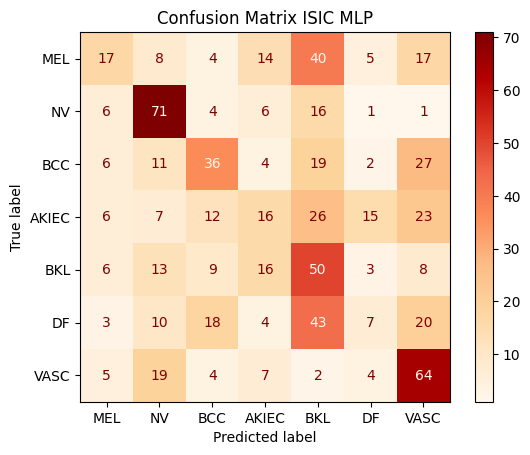

In [37]:
classes = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
#create and plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(best_clf,Xtest,Ytest,display_labels=classes,cmap=plt.cm.OrRd,normalize=None,)
plt.title("Confusion Matrix ISIC MLP")
plt.show()

At 35%, the accuracy can still be considered very poor, but we can see a big improvement compared to training without hyperparameter tuning.